# Air Quality Index Prediction and EDA

 ## 1. Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### 1.1 Read and investigate data

In [2]:
# read the csv file
data = pd.read_csv('station_hour.csv', low_memory=False).sort_values(by = ['Datetime', 'StationId'])
df = data.copy()


Let's look at the data

In [3]:
df.describe()

PM2.5          PM10            NO           NO2           NOx   
count  1.941394e+06  1.469831e+06  2.035372e+06  2.060110e+06  2.098275e+06  \
mean   8.086481e+01  1.584839e+02  2.278825e+01  3.523689e+01  4.055115e+01   
std    8.947618e+01  1.397883e+02  4.846146e+01  3.497508e+01  5.590894e+01   
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  0.000000e+00   
25%    2.816000e+01  6.400000e+01  3.050000e+00  1.310000e+01  1.135000e+01   
50%    5.259000e+01  1.162500e+02  7.150000e+00  2.479000e+01  2.286000e+01   
75%    9.774000e+01  2.040000e+02  1.858000e+01  4.548000e+01  4.570000e+01   
max    1.000000e+03  1.000000e+03  5.000000e+02  4.999900e+02  5.000000e+02   

                NH3            CO           SO2            O3       Benzene   
count  1.352465e+06  2.089781e+06  1.846346e+06  1.863110e+06  1.727504e+06  \
mean   2.870856e+01  1.502366e+00  1.211602e+01  3.806408e+01  3.305493e+00   
std    2.753244e+01  6.292445e+00  1.467385e+01  4.710653e+01  1.214053e+01   
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00   
25%    1.123000e+01  4.100000e-01  4.250000e+00  1.102000e+01  8.000000e-02   
50%    2.235000e+01  8.000000e-01  8.250000e+00  2.475000e+01  9.600000e-01   
75%    3.778000e+01  1.380000e+00  1.453000e+01  4.953000e+01  3.230000e+00   
max    4.999700e+02  4.985700e+02  1.999600e+02  9.970000e+02  4.980700e+02   

            Toluene         Xylene           AQI  
count  1.546717e+06  513979.000000  2.018893e+06  
mean   1.490266e+01       2.448881  1.801730e+02  
std    3.329729e+01       8.973470  1.404095e+02  
min    0.000000e+00       0.000000  5.000000e+00  
25%    3.400000e-01       0.000000  8.400000e+01  
50%    3.400000e+00       0.200000  1.310000e+02  
75%    1.510000e+01       1.830000  2.590000e+02  
max    4.999900e+02     499.990000  3.133000e+03

From the description of the AQI in kaggle, the maximum value of AQI is 1000. We can see that there are outliers in the data.  

In [4]:
df[df['AQI']> 1000].shape[0]/df.shape[0] * 100

0.1053654904072214

In [5]:
df.drop(df[df.AQI > 1000].index, inplace=True)
df.describe()

PM2.5          PM10            NO           NO2           NOx   
count  1.938719e+06  1.469442e+06  2.032749e+06  2.057479e+06  2.095615e+06  \
mean   8.079691e+01  1.584340e+02  2.269648e+01  3.513759e+01  4.045004e+01   
std    8.947585e+01  1.396873e+02  4.826406e+01  3.478986e+01  5.574789e+01   
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  0.000000e+00   
25%    2.811000e+01  6.398000e+01  3.050000e+00  1.309000e+01  1.134000e+01   
50%    5.250000e+01  1.162500e+02  7.140000e+00  2.475000e+01  2.283000e+01   
75%    9.750000e+01  2.040000e+02  1.853000e+01  4.540000e+01  4.562000e+01   
max    1.000000e+03  1.000000e+03  5.000000e+02  4.999900e+02  5.000000e+02   

                NH3            CO           SO2            O3       Benzene   
count  1.352378e+06  2.087161e+06  1.844117e+06  1.860660e+06  1.724854e+06  \
mean   2.870922e+01  1.386579e+00  1.203381e+01  3.808618e+01  3.288109e+00   
std    2.753246e+01  3.704627e+00  1.438668e+01  4.712477e+01  1.209839e+01   
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00   
25%    1.123000e+01  4.100000e-01  4.250000e+00  1.103000e+01  8.000000e-02   
50%    2.235000e+01  8.000000e-01  8.230000e+00  2.477000e+01  9.500000e-01   
75%    3.778000e+01  1.380000e+00  1.450000e+01  4.957000e+01  3.220000e+00   
max    4.999700e+02  3.880400e+02  1.999600e+02  9.970000e+02  4.980700e+02   

            Toluene         Xylene           AQI  
count  1.544114e+06  511398.000000  2.016165e+06  
mean   1.483126e+01       2.392345  1.781195e+02  
std    3.313170e+01       8.826517  1.271949e+02  
min    0.000000e+00       0.000000  5.000000e+00  
25%    3.300000e-01       0.000000  8.400000e+01  
50%    3.380000e+00       0.200000  1.310000e+02  
75%    1.500000e+01       1.780000  2.580000e+02  
max    4.999900e+02     499.990000  1.000000e+03

Convert Datetime into pandas datetime format. 

In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [7]:
print('Date starts from {}, and ends in {}'.format(df.Datetime.min().strftime('%Y-%m-%d'), df.Datetime.max().strftime('%Y-%m-%d')))

Date starts from 2015-01-01, and ends in 2020-07-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2586355 entries, 285144 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype         
---  ------      -----         
 0   StationId   object        
 1   Datetime    datetime64[ns]
 2   PM2.5       float64       
 3   PM10        float64       
 4   NO          float64       
 5   NO2         float64       
 6   NOx         float64       
 7   NH3         float64       
 8   CO          float64       
 9   SO2         float64       
 10  O3          float64       
 11  Benzene     float64       
 12  Toluene     float64       
 13  Xylene      float64       
 14  AQI         float64       
 15  AQI_Bucket  object        
dtypes: datetime64[ns](1), float64(13), object(2)
memory usage: 335.4+ MB


In [9]:
most_polluted = df[['StationId', 'AQI', 'PM10', 'CO']].groupby(['StationId']).mean().sort_values(by = 'AQI', ascending = False).head(5)
most_polluted

AQI        PM10         CO
StationId                                   
DL002      357.571361  351.845107   2.207099
GJ001      335.419156  108.071053  15.461902
DL028      294.138557  124.616304   1.411248
DL038      272.805198  277.390071   1.521695
DL020      270.627499  268.872021   1.366256

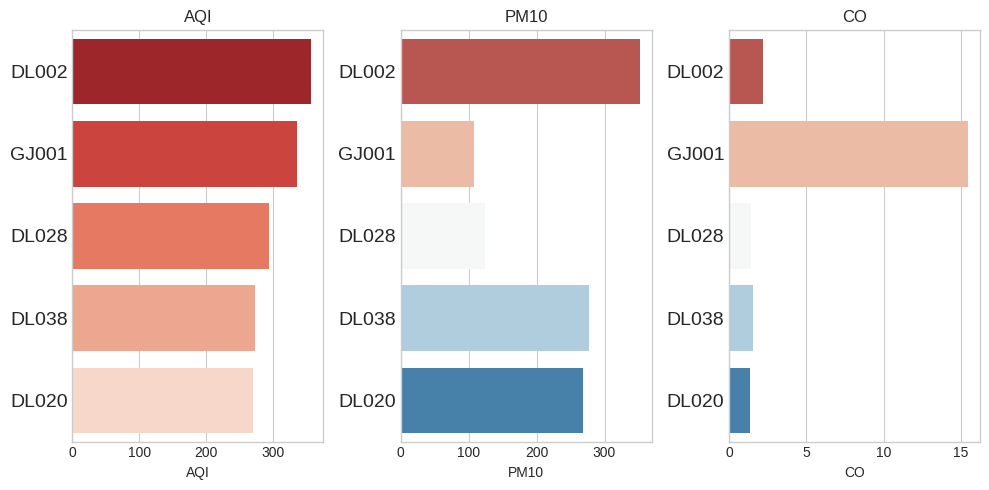

In [10]:
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (10,5))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AQI', 'PM10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

In [11]:
Cor = df.corr(numeric_only = True).AQI.sort_values(ascending = False)
Cor

AQI        1.000000
PM10       0.767608
PM2.5      0.719336
NO2        0.408338
NH3        0.390222
NOx        0.379202
NO         0.326048
CO         0.325609
SO2        0.273505
Toluene    0.262648
O3         0.152683
Benzene    0.102557
Xylene     0.065374
Name: AQI, dtype: float64

## 2. Handing missing Values

We can see there are missig (NaN) values from the above table. To see the percentage of missing values for each column, we use the following function.

In [12]:
print(df.isnull().sum())

StationId           0
Datetime            0
PM2.5          647636
PM10          1116913
NO             553606
NO2            528876
NOx            490740
NH3           1233977
CO             499194
SO2            742238
O3             725695
Benzene        861501
Toluene       1042241
Xylene        2074957
AQI            570190
AQI_Bucket     570190
dtype: int64


In [13]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
missing_values= missing_values_table(df)
missing_values

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


Missing Values  % of Total Values
Xylene             2074957               80.2
NH3                1233977               47.7
PM10               1116913               43.2
Toluene            1042241               40.3
Benzene             861501               33.3
SO2                 742238               28.7
O3                  725695               28.1
PM2.5               647636               25.0
AQI                 570190               22.0
AQI_Bucket          570190               22.0
NO                  553606               21.4
NO2                 528876               20.4
CO                  499194               19.3
NOx                 490740               19.0

We can see that 80% and close to 50% of data is missing for Xylene and NH3 respectively. If the majority of data is missing, usually it is safe to drop the column all together.

To hanlde missing values for the other columns, we can use:
 - with mean, median and mode imputation
 - with forward and backward filling
 - linear interpolation

### 2.1. Mean, median and mode imputation

Let's use SimpleImputer from sklearn:

In [15]:
df3 = df.copy()

In [16]:
df3.drop(['AQI_Bucket'], axis=1)

StationId            Datetime   PM2.5    PM10      NO    NO2     NOx   
285144      DL007 2015-01-01 01:00:00  598.51  935.18   69.03  35.69  104.72  \
333336      DL008 2015-01-01 01:00:00     NaN     NaN   78.25  51.50   91.00   
485877      DL013 2015-01-01 01:00:00  310.65     NaN   30.37  17.73   35.31   
733579      DL021 2015-01-01 01:00:00     NaN     NaN     NaN  65.00  488.03   
1067398     DL033 2015-01-01 01:00:00     NaN     NaN  148.44  39.00  219.25   
...           ...                 ...     ...     ...     ...    ...     ...   
2537760     WB009 2020-07-01 00:00:00   10.52   34.55    1.75  11.02   12.78   
2547206     WB010 2020-07-01 00:00:00   14.70   29.00    3.10   6.78    9.88   
2561669     WB011 2020-07-01 00:00:00   12.57   41.40   18.00  13.70   31.70   
2569579     WB012 2020-07-01 00:00:00    8.38   36.18    4.53   6.85   11.38   
2589082     WB013 2020-07-01 00:00:00   10.50   36.50    7.78  22.50   30.25   

           NH3     CO   SO2      O3  Benzene  Toluene  Xylene   AQI  
285144     NaN   0.58   NaN  108.02    12.89    19.85   13.80   NaN  
333336    5.75    NaN   NaN  105.25      NaN      NaN     NaN   NaN  
485877   49.32    NaN  8.23     NaN      NaN      NaN     NaN   NaN  
733579     NaN  18.00  1.50    3.50    34.65    63.44     NaN   NaN  
1067398    NaN    NaN  0.50    3.00    28.17    92.41     NaN   NaN  
...        ...    ...   ...     ...      ...      ...     ...   ...  
2537760   3.07   0.23  3.12   12.48     1.35     5.99    0.33  38.0  
2547206   6.78   0.33  3.23   10.97      NaN      NaN     NaN  35.0  
2561669  28.73   0.21  8.36   48.19     3.88    34.21     NaN  62.0  
2569579   7.95   0.16  5.50    6.13     1.60     2.69     NaN  39.0  
2589082  27.23   0.58  2.80   13.10     1.31     7.39     NaN  59.0  

[2586355 rows x 15 columns]

In [17]:
df3 = df3.set_index('Datetime').sort_values(by = 'Datetime')

In [18]:
from sklearn.impute import SimpleImputer

for method in ["mean", "median", "most_frequent"]:
    df3[method] = SimpleImputer(strategy=method).fit_transform(
        df3["NH3"].values.reshape(-1, 1)
    )

This will calculate mean, median and mode for column NH3 to fill the missing values.

### 2.2. Forward and Backward filling

Still for the same NH3 column, we can fill nan values:

In [19]:
# fill NaN of NH3 column with forward and backward fill
df3["ffill"] = df3["NH3"].ffill()
df3["bfill"] = df3["NH3"].bfill()

### 2.3. Linear interpolation

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [20]:
# interpolate for NH3 column
df3["interpolated"] = df3["NH3"].interpolate(limit_direction="both")

We will use the following function to plot the original distribution before and after an imputation(s) is performed:

In [21]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=3, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=1, label=key, ax=ax)

    plt.legend()
    plt.show();

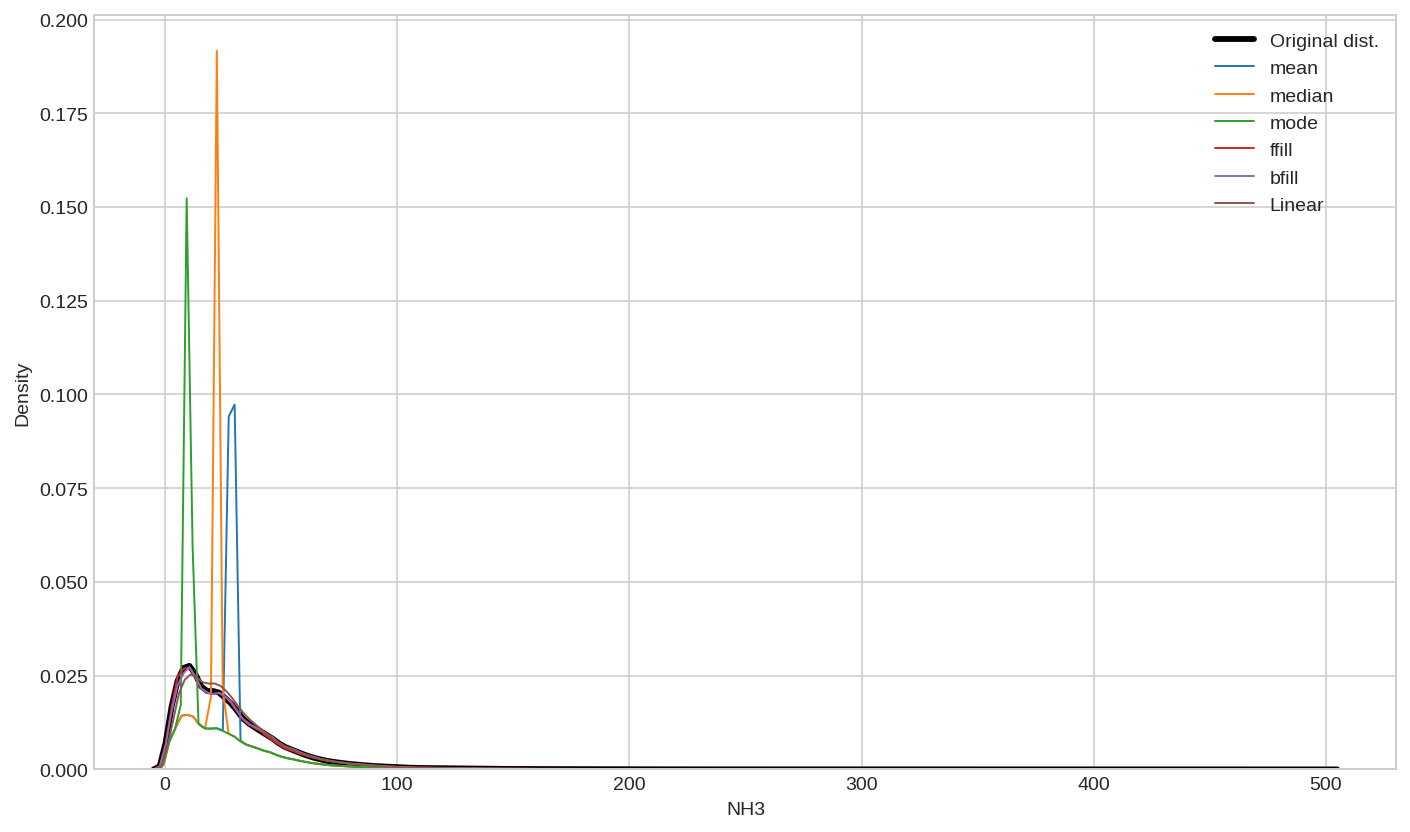

In [22]:
compare_dists(
    df3["NH3"],
    {"mean": df3["mean"], "median": df3["median"], "mode": df3["most_frequent"], "ffill":df3["ffill"], 
     "bfill":df3["bfill"], "Linear":df3["interpolated"]},)

We can see that forward filling, backward filling and Linear interpolation provide a plot close to the original distribution, as is the case for time series data. We can repeat the same for the other colums to decide which method to use. 

Let's drop mean, median and mode and repeat the plot for visiblity.

In [23]:
df3.drop(["mean", "median", "most_frequent"], axis=1, inplace=True)

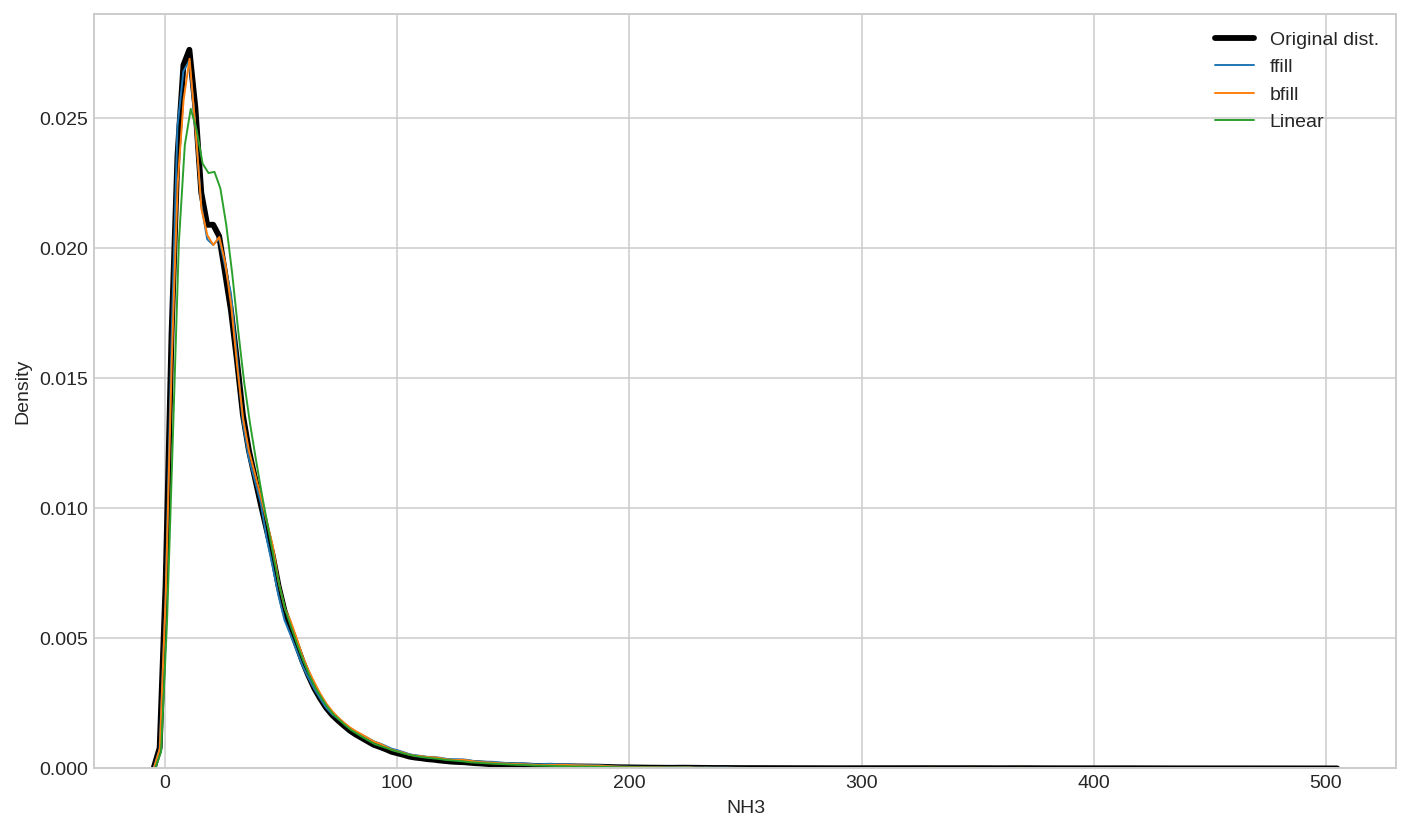

In [24]:
compare_dists(
    df3["NH3"],
    {"ffill":df3["ffill"], "bfill":df3["bfill"], "Linear":df3["interpolated"]},)

For NH3 all appear closer to the original disttribution. 

#### Repeat for PM10

In [25]:
# fill NaN of PM10 column with forward and backward fill
df3["PM10_ffill"] = df3["PM10"].ffill()
df3["PM10_bfill"] = df3["PM10"].bfill()

In [26]:
# interpolate for PM10 column
df3["PM10_interpolated"] = df3["PM10"].interpolate(limit_direction="both")

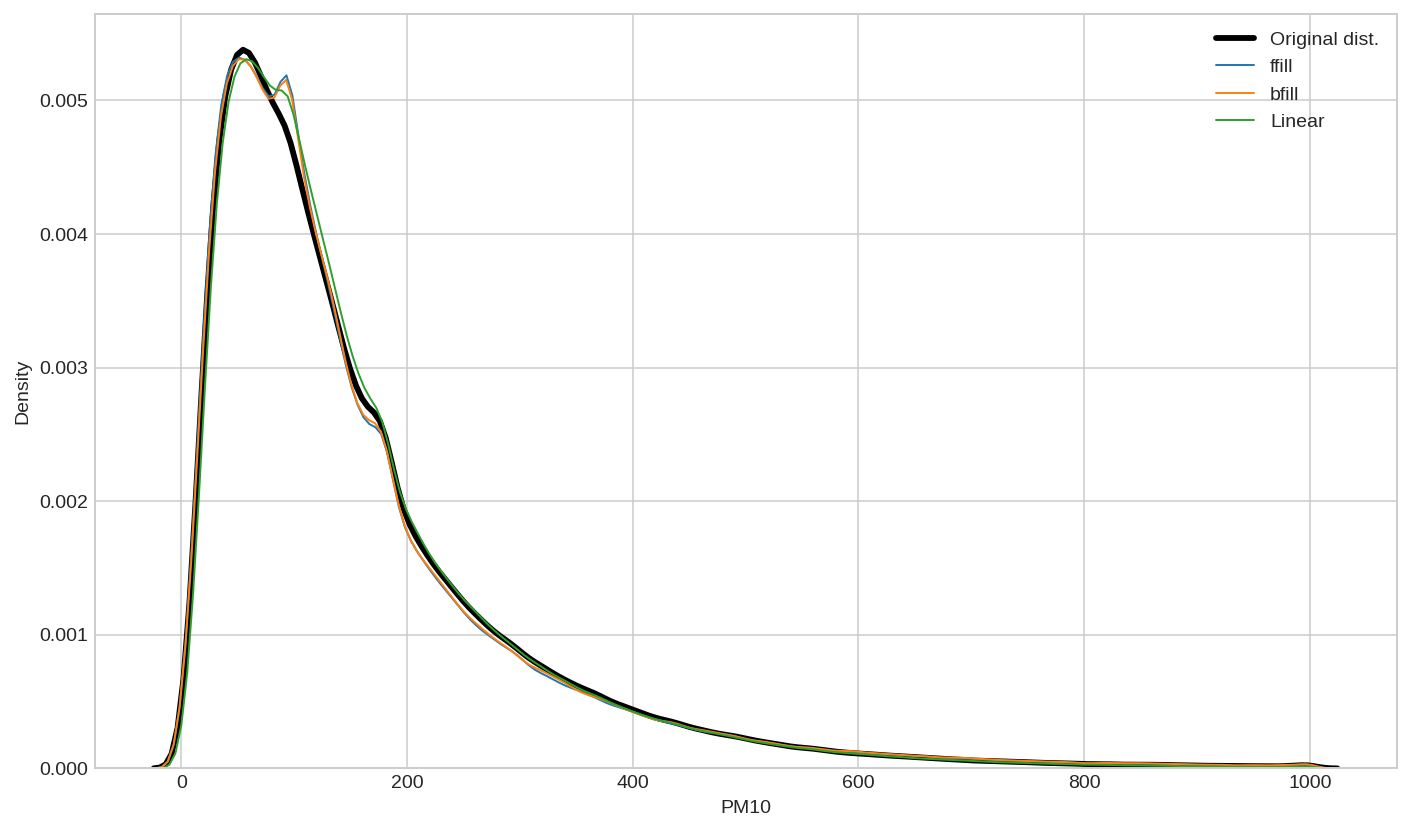

In [27]:
compare_dists(
    df3["PM10"],
    {"ffill":df3["PM10_ffill"], "bfill":df3["PM10_bfill"], "Linear":df3["PM10_interpolated"]},)

In [28]:
df3

StationId   PM2.5    PM10      NO     NO2     NOx    NH3   
Datetime                                                                       
2015-01-01 01:00:00     DL007  598.51  935.18   69.03   35.69  104.72    NaN  \
2015-01-01 01:00:00     UP014     NaN     NaN    2.87    5.00    2.21    NaN   
2015-01-01 01:00:00     UP012     NaN     NaN    1.66   19.77    6.24    NaN   
2015-01-01 01:00:00     TN004     NaN     NaN  106.46  120.34  139.05    NaN   
2015-01-01 01:00:00     TN001     NaN     NaN    8.85   12.91   20.85    NaN   
...                       ...     ...     ...     ...     ...     ...    ...   
2020-07-01 00:00:00     DL021   82.93     NaN    3.67   26.02   16.65    NaN   
2020-07-01 00:00:00     DL020   47.00  137.25    5.80   22.05   16.45  40.55   
2020-07-01 00:00:00     DL019   48.75   63.75    0.85   24.12   13.50  11.65   
2020-07-01 00:00:00     DL030   18.69  110.56    3.60    7.34   10.94    NaN   
2020-07-01 00:00:00     WB013   10.50   36.50    7.78   22.50   30.25  27.23   

                        CO     SO2      O3  ...  Toluene  Xylene    AQI   
Datetime                                    ...                           
2015-01-01 01:00:00   0.58     NaN  108.02  ...    19.85    13.8    NaN  \
2015-01-01 01:00:00  24.79  169.28   12.92  ...     9.48     NaN    NaN   
2015-01-01 01:00:00   1.05     NaN   35.00  ...     0.02     NaN    NaN   
2015-01-01 01:00:00   0.63    7.49   11.42  ...      NaN     NaN    NaN   
2015-01-01 01:00:00   1.25    7.65    3.88  ...      NaN     NaN    NaN   
...                    ...     ...     ...  ...      ...     ...    ...   
2020-07-01 00:00:00   0.87    0.08   26.95  ...     1.21     NaN   95.0   
2020-07-01 00:00:00   0.65   17.27   12.62  ...    10.95     NaN  105.0   
2020-07-01 00:00:00   0.67   20.88   21.08  ...    44.85     2.6   72.0   
2020-07-01 00:00:00   2.08     NaN   29.97  ...     0.25     0.0  101.0   
2020-07-01 00:00:00   0.58    2.80   13.10  ...     7.39     NaN   59.0   

                       AQI_Bucket  ffill  bfill  interpolated  PM10_ffill   
Datetime                                                                    
2015-01-01 01:00:00           NaN    NaN  19.10        19.100      935.18  \
2015-01-01 01:00:00           NaN    NaN  19.10        19.100      935.18   
2015-01-01 01:00:00           NaN    NaN  19.10        19.100      935.18   
2015-01-01 01:00:00           NaN    NaN  19.10        19.100      935.18   
2015-01-01 01:00:00           NaN    NaN  19.10        19.100      935.18   
...                           ...    ...    ...           ...         ...   
2020-07-01 00:00:00  Satisfactory  21.12  40.55        30.835      123.00   
2020-07-01 00:00:00      Moderate  40.55  40.55        40.550      137.25   
2020-07-01 00:00:00  Satisfactory  11.65  11.65        11.650       63.75   
2020-07-01 00:00:00      Moderate  11.65  27.23        19.440      110.56   
2020-07-01 00:00:00  Satisfactory  27.23  27.23        27.230       36.50   

                     PM10_bfill  PM10_interpolated  
Datetime                                            
2015-01-01 01:00:00      935.18         935.180000  
2015-01-01 01:00:00      976.99         935.794853  
2015-01-01 01:00:00      976.99         936.409706  
2015-01-01 01:00:00      976.99         937.024559  
2015-01-01 01:00:00      976.99         937.639412  
...                         ...                ...  
2020-07-01 00:00:00      137.25         130.125000  
2020-07-01 00:00:00      137.25         137.250000  
2020-07-01 00:00:00       63.75          63.750000  
2020-07-01 00:00:00      110.56         110.560000  
2020-07-01 00:00:00       36.50          36.500000  

[2586355 rows x 21 columns]

In [29]:
#This is not working; I'll come back if I got time
#cols = ['AQI', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene']
#inter = df.loc[:, cols].interpolate(limit_direction="both"); 
#df.loc[:, cols] = inter

# Fill the mssing value wiht Mean value of numeric data.
df3['PM2.5'].fillna(df3['PM2.5'].mean().round(2),inplace = True )
df3['PM10'].fillna(df3['PM10'].mean().round(2),inplace = True )
df3['NO'].fillna(df3['NO'].mean().round(2),inplace = True )
df3['NO2'].fillna(df3['NO2'].mean().round(2),inplace = True )
df3['NOx'].fillna(df3['NOx'].mean().round(2),inplace = True )
df3['NH3'].fillna(df3['NH3'].mean().round(2),inplace = True )
df3['CO'].fillna(df3['CO'].mean().round(2),inplace = True )
df3['SO2'].fillna(df3['SO2'].mean().round(2),inplace = True )
df3['O3'].fillna(df3['O3'].mean().round(2),inplace = True )
df3['Benzene'].fillna(df3['Benzene'].mean().round(2),inplace = True )
df3['Toluene'].fillna(df3['Toluene'].mean().round(2),inplace = True )
df3['Xylene'].fillna(df3['Xylene'].mean().round(2),inplace = True )
df3['AQI'].fillna(df3['AQI'].mean().round(2),inplace = True )

In [30]:

# Group the data by 'StationId'
grouped_data = df3.groupby('StationId')

# Create an empty DataFrame to store the imputed data
imputed_data = pd.DataFrame()

# Iterate over each group (station)
for group_name, group_df in grouped_data:
    # Apply linear interpolation to fill missing values
    filled_df = group_df.interpolate(method='linear', limit_direction='both')
    
    # Concatenate the filled data to the imputed_data DataFrame
    imputed_data = pd.concat([imputed_data, filled_df])

# Sort the imputed data by 'StationId' and 'Datetime'
imputed_data.sort_values(['StationId', 'Datetime'], inplace=True)

# Reset the index of the imputed data
#imputed_data.reset_index(drop=True, inplace=True)

In [31]:
imputed_data

StationId  PM2.5    PM10    NO    NO2    NOx    NH3    CO   
Datetime                                                                        
2017-11-24 17:00:00     AP001  60.50   98.00  2.35  30.80  18.25   8.50  0.10  \
2017-11-24 18:00:00     AP001  65.50  111.25  2.70  24.20  15.07   9.77  0.10   
2017-11-24 19:00:00     AP001  80.00  132.00  2.10  25.18  15.15  12.02  0.10   
2017-11-24 20:00:00     AP001  81.50  133.25  1.95  16.25  10.23  11.58  0.10   
2017-11-24 21:00:00     AP001  75.25  116.00  1.43  17.48  10.43  12.03  0.10   
...                       ...    ...     ...   ...    ...    ...    ...   ...   
2020-06-30 20:00:00     WB013  15.55   47.80  7.27  35.08  42.38  31.25  0.80   
2020-06-30 21:00:00     WB013  15.23   42.30  6.10  26.78  32.85  30.66  0.56   
2020-06-30 22:00:00     WB013  11.40   40.95  6.58  19.53  26.12  30.73  0.61   
2020-06-30 23:00:00     WB013   9.25   34.33  9.17  21.85  31.00  29.61  0.65   
2020-07-01 00:00:00     WB013  10.50   36.50  7.78  22.50  30.25  27.23  0.58   

                       SO2      O3  ...  Toluene  Xylene     AQI   
Datetime                            ...                            
2017-11-24 17:00:00  11.85  126.40  ...     6.10    0.10  178.12  \
2017-11-24 18:00:00  13.17  117.12  ...     6.25    0.15  178.12   
2017-11-24 19:00:00  12.08   98.98  ...     5.98    0.18  178.12   
2017-11-24 20:00:00  10.47  112.20  ...     6.72    0.10  178.12   
2017-11-24 21:00:00   9.12  106.35  ...     5.75    0.08  178.12   
...                    ...     ...  ...      ...     ...     ...   
2020-06-30 20:00:00   9.40   17.24  ...    11.57    2.39   59.00   
2020-06-30 21:00:00   4.91   17.46  ...    12.29    2.39   59.00   
2020-06-30 22:00:00   3.81   17.24  ...     8.88    2.39   59.00   
2020-06-30 23:00:00   3.44   12.74  ...     8.43    2.39   59.00   
2020-07-01 00:00:00   2.80   13.10  ...     7.39    2.39   59.00   

                       AQI_Bucket  ffill  bfill  interpolated  PM10_ffill   
Datetime                                                                    
2017-11-24 17:00:00           NaN   8.50   8.50          8.50       98.00  \
2017-11-24 18:00:00           NaN   9.77   9.77          9.77      111.25   
2017-11-24 19:00:00           NaN  12.02  12.02         12.02      132.00   
2017-11-24 20:00:00           NaN  11.58  11.58         11.58      133.25   
2017-11-24 21:00:00           NaN  12.03  12.03         12.03      116.00   
...                           ...    ...    ...           ...         ...   
2020-06-30 20:00:00  Satisfactory  31.25  31.25         31.25       47.80   
2020-06-30 21:00:00  Satisfactory  30.66  30.66         30.66       42.30   
2020-06-30 22:00:00  Satisfactory  30.73  30.73         30.73       40.95   
2020-06-30 23:00:00  Satisfactory  29.61  29.61         29.61       34.33   
2020-07-01 00:00:00  Satisfactory  27.23  27.23         27.23       36.50   

                     PM10_bfill  PM10_interpolated  
Datetime                                            
2017-11-24 17:00:00       98.00              98.00  
2017-11-24 18:00:00      111.25             111.25  
2017-11-24 19:00:00      132.00             132.00  
2017-11-24 20:00:00      133.25             133.25  
2017-11-24 21:00:00      116.00             116.00  
...                         ...                ...  
2020-06-30 20:00:00       47.80              47.80  
2020-06-30 21:00:00       42.30              42.30  
2020-06-30 22:00:00       40.95              40.95  
2020-06-30 23:00:00       34.33              34.33  
2020-07-01 00:00:00       36.50              36.50  

[2586355 rows x 21 columns]

In [32]:
df3 = imputed_data.copy()
df3

StationId  PM2.5    PM10    NO    NO2    NOx    NH3    CO   
Datetime                                                                        
2017-11-24 17:00:00     AP001  60.50   98.00  2.35  30.80  18.25   8.50  0.10  \
2017-11-24 18:00:00     AP001  65.50  111.25  2.70  24.20  15.07   9.77  0.10   
2017-11-24 19:00:00     AP001  80.00  132.00  2.10  25.18  15.15  12.02  0.10   
2017-11-24 20:00:00     AP001  81.50  133.25  1.95  16.25  10.23  11.58  0.10   
2017-11-24 21:00:00     AP001  75.25  116.00  1.43  17.48  10.43  12.03  0.10   
...                       ...    ...     ...   ...    ...    ...    ...   ...   
2020-06-30 20:00:00     WB013  15.55   47.80  7.27  35.08  42.38  31.25  0.80   
2020-06-30 21:00:00     WB013  15.23   42.30  6.10  26.78  32.85  30.66  0.56   
2020-06-30 22:00:00     WB013  11.40   40.95  6.58  19.53  26.12  30.73  0.61   
2020-06-30 23:00:00     WB013   9.25   34.33  9.17  21.85  31.00  29.61  0.65   
2020-07-01 00:00:00     WB013  10.50   36.50  7.78  22.50  30.25  27.23  0.58   

                       SO2      O3  ...  Toluene  Xylene     AQI   
Datetime                            ...                            
2017-11-24 17:00:00  11.85  126.40  ...     6.10    0.10  178.12  \
2017-11-24 18:00:00  13.17  117.12  ...     6.25    0.15  178.12   
2017-11-24 19:00:00  12.08   98.98  ...     5.98    0.18  178.12   
2017-11-24 20:00:00  10.47  112.20  ...     6.72    0.10  178.12   
2017-11-24 21:00:00   9.12  106.35  ...     5.75    0.08  178.12   
...                    ...     ...  ...      ...     ...     ...   
2020-06-30 20:00:00   9.40   17.24  ...    11.57    2.39   59.00   
2020-06-30 21:00:00   4.91   17.46  ...    12.29    2.39   59.00   
2020-06-30 22:00:00   3.81   17.24  ...     8.88    2.39   59.00   
2020-06-30 23:00:00   3.44   12.74  ...     8.43    2.39   59.00   
2020-07-01 00:00:00   2.80   13.10  ...     7.39    2.39   59.00   

                       AQI_Bucket  ffill  bfill  interpolated  PM10_ffill   
Datetime                                                                    
2017-11-24 17:00:00           NaN   8.50   8.50          8.50       98.00  \
2017-11-24 18:00:00           NaN   9.77   9.77          9.77      111.25   
2017-11-24 19:00:00           NaN  12.02  12.02         12.02      132.00   
2017-11-24 20:00:00           NaN  11.58  11.58         11.58      133.25   
2017-11-24 21:00:00           NaN  12.03  12.03         12.03      116.00   
...                           ...    ...    ...           ...         ...   
2020-06-30 20:00:00  Satisfactory  31.25  31.25         31.25       47.80   
2020-06-30 21:00:00  Satisfactory  30.66  30.66         30.66       42.30   
2020-06-30 22:00:00  Satisfactory  30.73  30.73         30.73       40.95   
2020-06-30 23:00:00  Satisfactory  29.61  29.61         29.61       34.33   
2020-07-01 00:00:00  Satisfactory  27.23  27.23         27.23       36.50   

                     PM10_bfill  PM10_interpolated  
Datetime                                            
2017-11-24 17:00:00       98.00              98.00  
2017-11-24 18:00:00      111.25             111.25  
2017-11-24 19:00:00      132.00             132.00  
2017-11-24 20:00:00      133.25             133.25  
2017-11-24 21:00:00      116.00             116.00  
...                         ...                ...  
2020-06-30 20:00:00       47.80              47.80  
2020-06-30 21:00:00       42.30              42.30  
2020-06-30 22:00:00       40.95              40.95  
2020-06-30 23:00:00       34.33              34.33  
2020-07-01 00:00:00       36.50              36.50  

[2586355 rows x 21 columns]

From the explanation for AQI index calculation, we can use the following function to fill the missing values of AQI_Bucket.

In [33]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [34]:
df3['AQI_Bucket'] = df3['AQI'].apply(lambda x: get_AQI_bucket(x))

In [35]:
print(df3.isnull().sum())

StationId            0
PM2.5                0
PM10                 0
NO                   0
NO2                  0
NOx                  0
NH3                  0
CO                   0
SO2                  0
O3                   0
Benzene              0
Toluene              0
Xylene               0
AQI                  0
AQI_Bucket           0
ffill                0
bfill                0
interpolated         0
PM10_ffill           0
PM10_bfill           0
PM10_interpolated    0
dtype: int64


In [36]:
df3=df3.drop(['ffill', 'bfill', 'interpolated', 'PM10_ffill','PM10_bfill','PM10_interpolated'], axis=1)

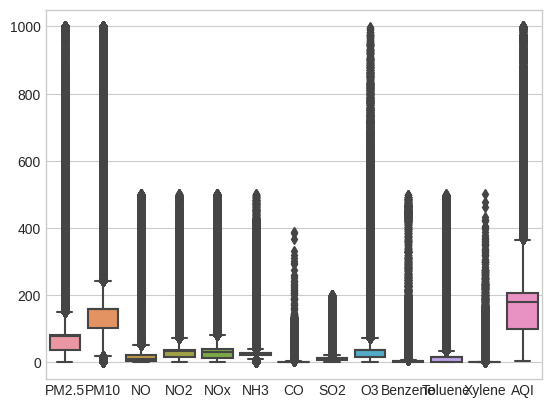

In [37]:
ax = sns.boxplot(data=df3)

#### Looking at the pollutants and their distribution
From the plots, we can make the following observations:
 - PM2.5 and PM10 are major pollutants
 - CO is relatively low
 - most exhibited seasonality though further observations are required

In [38]:
#df3 = df3.set_index('Datetime').sort_values(by = 'Datetime')

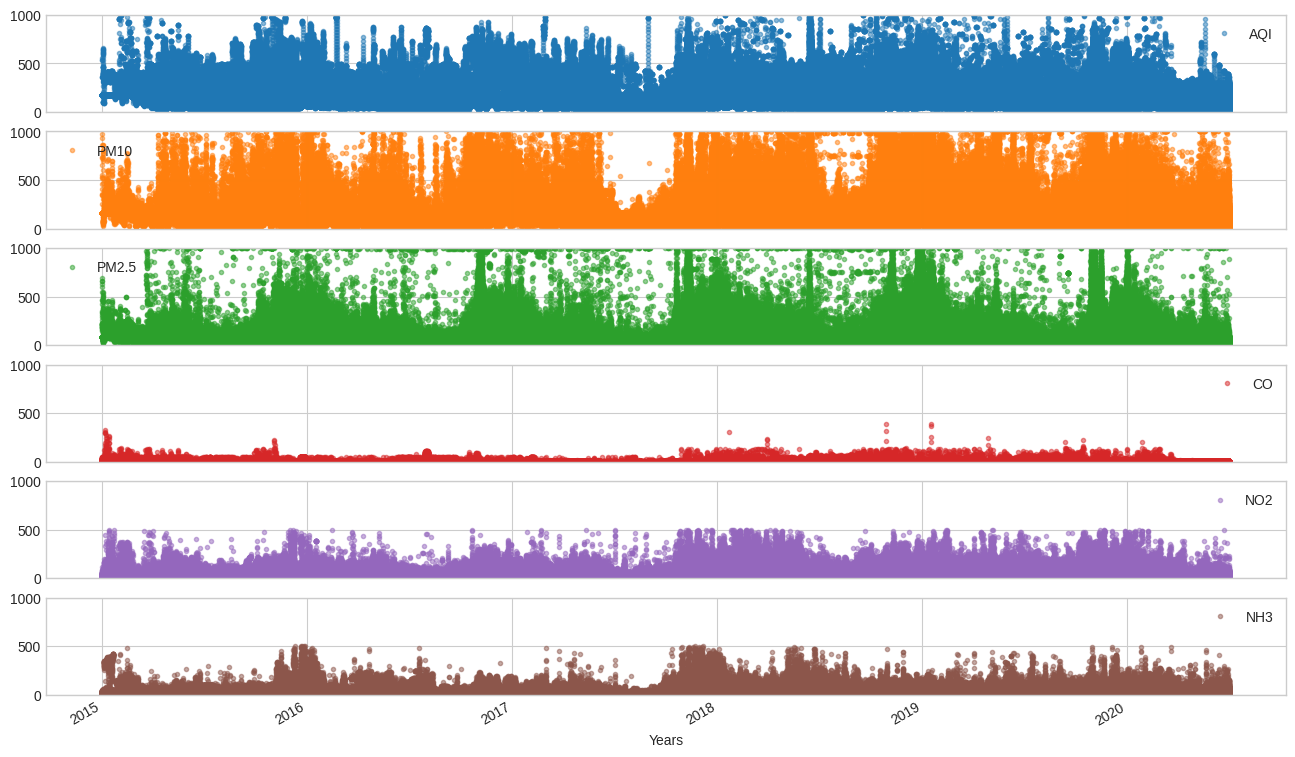

In [39]:
pollutants = ['AQI','PM10', 'PM2.5', 'CO', 'NO2','NH3']
axes = df3[pollutants].plot(marker='.',alpha = 0.5, linestyle = 'None', figsize = (16,10), subplots = True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylim(0,1000)

Let's see the correllation of major pollutants.

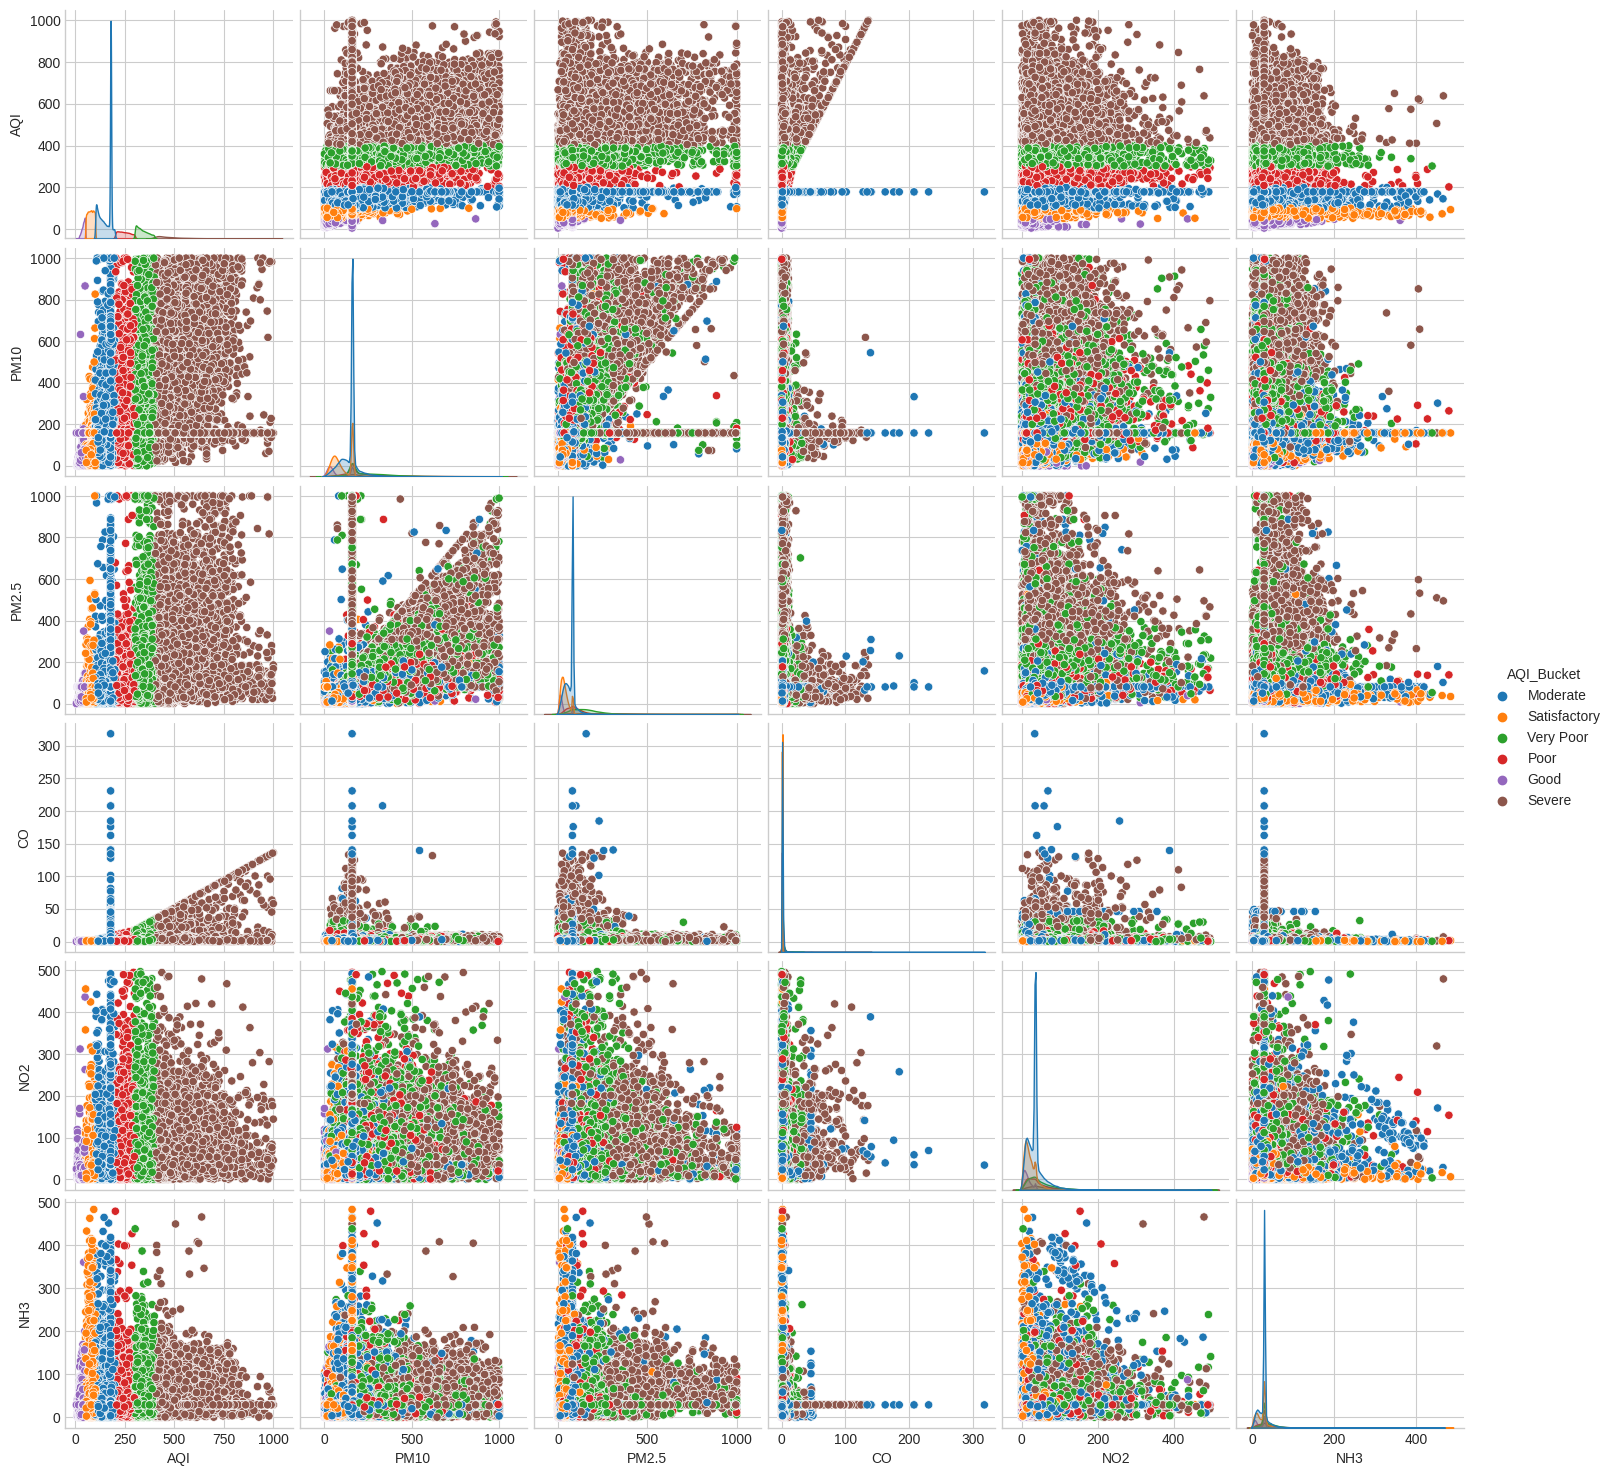

In [40]:
sns.pairplot(df3.sample(frac=0.1).reset_index(), vars=pollutants, hue ='AQI_Bucket')

Overall: Most variables show normal distribution
 - CO: skewed to the left and seems to have a linear correlations with AQI
 - AQI: There appears to be more data points for satisfactory and moderate AQI
 

#### Now let's see the seasonality in the data
Let's convert the data into daily, weekly, and monthly versions.

In [41]:
def plot_(df3, pollutants, stations):
    fig, ax = plt.subplots(3, 2, figsize=(16, 12), dpi=140)
    for ax1, pol in zip(ax.flat, pollutants):
        for st in stations:
            df3[pol][st].plot(x = 'Hour', title= pol, ax = ax1)
            ax1.legend();

#### Now let's see the seasonality in the data¶
Let's convert the data into daily, weekly, and monthly versions.

In [42]:
df1 = df3.copy()

In [43]:
df1 = df1.drop(['AQI_Bucket'], axis=1)

In [44]:
df1

StationId  PM2.5    PM10    NO    NO2    NOx    NH3    CO   
Datetime                                                                        
2017-11-24 17:00:00     AP001  60.50   98.00  2.35  30.80  18.25   8.50  0.10  \
2017-11-24 18:00:00     AP001  65.50  111.25  2.70  24.20  15.07   9.77  0.10   
2017-11-24 19:00:00     AP001  80.00  132.00  2.10  25.18  15.15  12.02  0.10   
2017-11-24 20:00:00     AP001  81.50  133.25  1.95  16.25  10.23  11.58  0.10   
2017-11-24 21:00:00     AP001  75.25  116.00  1.43  17.48  10.43  12.03  0.10   
...                       ...    ...     ...   ...    ...    ...    ...   ...   
2020-06-30 20:00:00     WB013  15.55   47.80  7.27  35.08  42.38  31.25  0.80   
2020-06-30 21:00:00     WB013  15.23   42.30  6.10  26.78  32.85  30.66  0.56   
2020-06-30 22:00:00     WB013  11.40   40.95  6.58  19.53  26.12  30.73  0.61   
2020-06-30 23:00:00     WB013   9.25   34.33  9.17  21.85  31.00  29.61  0.65   
2020-07-01 00:00:00     WB013  10.50   36.50  7.78  22.50  30.25  27.23  0.58   

                       SO2      O3  Benzene  Toluene  Xylene     AQI  
Datetime                                                              
2017-11-24 17:00:00  11.85  126.40     0.10     6.10    0.10  178.12  
2017-11-24 18:00:00  13.17  117.12     0.10     6.25    0.15  178.12  
2017-11-24 19:00:00  12.08   98.98     0.20     5.98    0.18  178.12  
2017-11-24 20:00:00  10.47  112.20     0.20     6.72    0.10  178.12  
2017-11-24 21:00:00   9.12  106.35     0.20     5.75    0.08  178.12  
...                    ...     ...      ...      ...     ...     ...  
2020-06-30 20:00:00   9.40   17.24     2.56    11.57    2.39   59.00  
2020-06-30 21:00:00   4.91   17.46     3.49    12.29    2.39   59.00  
2020-06-30 22:00:00   3.81   17.24     1.83     8.88    2.39   59.00  
2020-06-30 23:00:00   3.44   12.74     1.40     8.43    2.39   59.00  
2020-07-01 00:00:00   2.80   13.10     1.31     7.39    2.39   59.00  

[2586355 rows x 14 columns]

In [45]:
#df1 = df1.set_index('Datetime').sort_values(by = 'Datetime')

In [46]:
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Week']=df1.index.dayofweek
df1['Day'] = df1.index.day
df1['Hour'] = df1.index.hour

In [47]:
df1

StationId  PM2.5    PM10    NO    NO2    NOx    NH3    CO   
Datetime                                                                        
2017-11-24 17:00:00     AP001  60.50   98.00  2.35  30.80  18.25   8.50  0.10  \
2017-11-24 18:00:00     AP001  65.50  111.25  2.70  24.20  15.07   9.77  0.10   
2017-11-24 19:00:00     AP001  80.00  132.00  2.10  25.18  15.15  12.02  0.10   
2017-11-24 20:00:00     AP001  81.50  133.25  1.95  16.25  10.23  11.58  0.10   
2017-11-24 21:00:00     AP001  75.25  116.00  1.43  17.48  10.43  12.03  0.10   
...                       ...    ...     ...   ...    ...    ...    ...   ...   
2020-06-30 20:00:00     WB013  15.55   47.80  7.27  35.08  42.38  31.25  0.80   
2020-06-30 21:00:00     WB013  15.23   42.30  6.10  26.78  32.85  30.66  0.56   
2020-06-30 22:00:00     WB013  11.40   40.95  6.58  19.53  26.12  30.73  0.61   
2020-06-30 23:00:00     WB013   9.25   34.33  9.17  21.85  31.00  29.61  0.65   
2020-07-01 00:00:00     WB013  10.50   36.50  7.78  22.50  30.25  27.23  0.58   

                       SO2      O3  Benzene  Toluene  Xylene     AQI  Year   
Datetime                                                                     
2017-11-24 17:00:00  11.85  126.40     0.10     6.10    0.10  178.12  2017  \
2017-11-24 18:00:00  13.17  117.12     0.10     6.25    0.15  178.12  2017   
2017-11-24 19:00:00  12.08   98.98     0.20     5.98    0.18  178.12  2017   
2017-11-24 20:00:00  10.47  112.20     0.20     6.72    0.10  178.12  2017   
2017-11-24 21:00:00   9.12  106.35     0.20     5.75    0.08  178.12  2017   
...                    ...     ...      ...      ...     ...     ...   ...   
2020-06-30 20:00:00   9.40   17.24     2.56    11.57    2.39   59.00  2020   
2020-06-30 21:00:00   4.91   17.46     3.49    12.29    2.39   59.00  2020   
2020-06-30 22:00:00   3.81   17.24     1.83     8.88    2.39   59.00  2020   
2020-06-30 23:00:00   3.44   12.74     1.40     8.43    2.39   59.00  2020   
2020-07-01 00:00:00   2.80   13.10     1.31     7.39    2.39   59.00  2020   

                     Month  Week  Day  Hour  
Datetime                                     
2017-11-24 17:00:00     11     4   24    17  
2017-11-24 18:00:00     11     4   24    18  
2017-11-24 19:00:00     11     4   24    19  
2017-11-24 20:00:00     11     4   24    20  
2017-11-24 21:00:00     11     4   24    21  
...                    ...   ...  ...   ...  
2020-06-30 20:00:00      6     1   30    20  
2020-06-30 21:00:00      6     1   30    21  
2020-06-30 22:00:00      6     1   30    22  
2020-06-30 23:00:00      6     1   30    23  
2020-07-01 00:00:00      7     2    1     0  

[2586355 rows x 19 columns]

In [48]:
hour_day = df1.groupby(['StationId', 'Hour']).mean()

In [49]:
hour_day

PM2.5        PM10         NO        NO2         NOx   
StationId Hour                                                            
AP001     0     48.632789   94.014937   6.678579  26.078916   19.521505  \
          1     48.195732   93.081465   6.497566  25.491254   19.009494   
          2     46.647524   89.452339   6.815585  25.429326   19.237587   
          3     47.698419   89.806976   7.409168  25.482424   19.821106   
          4     46.898841   87.466807   7.619515  24.978736   19.766913   
...                   ...         ...        ...        ...         ...   
WB013     19    50.806507   98.315707  27.463715  73.398057   97.955387   
          20    53.862509  104.635191  50.193653  74.555105  111.325707   
          21    58.891255  114.358339  63.007331  71.212915  105.596335   
          22    64.716802  122.930431  67.972817  65.705375  101.112079   
          23    69.152497  129.022362  64.037552  60.031378   95.984022   

                      NH3        CO        SO2         O3   Benzene   
StationId Hour                                                        
AP001     0     14.310179  0.809895  11.686842  28.935821  1.003274  \
          1     14.355216  0.736628  11.350211  28.525047  1.236091   
          2     14.352160  0.736291  11.149494  27.672076  0.849062   
          3     14.643372  0.748240  11.187945  26.966733  0.842950   
          4     14.778198  0.747492  11.158556  27.516818  0.871570   
...                   ...       ...        ...        ...       ...   
WB013     19    19.367429  1.194883   7.907626  22.649692  5.573985   
          20    20.469779  1.391796   7.875154  19.429533  6.277749   
          21    21.339840  1.517860   7.611378  18.489963  6.950197   
          22    21.766802  1.600148   7.215609  18.722214  7.309114   
          23    22.009766  1.614859   6.554883  18.524772  7.307737   

                  Toluene    Xylene         AQI         Year     Month   
StationId Hour                                                           
AP001     0      3.954253  1.599663  109.070695  2018.730526  6.153684  \
          1      4.086575  1.652866  107.057619  2018.729189  6.152792   
          2      4.125806  1.699515  104.918440  2018.729189  6.152792   
          3      4.466870  1.770727  102.472792  2018.729189  6.152792   
          4      4.656797  1.743541  102.429336  2018.729189  6.152792   
...                   ...       ...         ...          ...       ...   
WB013     19    10.406310  2.390000  147.081427  2018.896679  6.377614   
          20    11.664686  2.390000  147.409840  2018.896679  6.377614   
          21    12.799016  2.390000  147.695351  2018.896679  6.377614   
          22    13.487134  2.390000  147.135695  2018.896679  6.377614   
          23    13.564293  2.390000  145.751931  2018.896679  6.377614   

                    Week        Day  
StationId Hour                       
AP001     0     2.998947  15.780000  
          1     3.000000  15.795574  
          2     3.000000  15.795574  
          3     3.000000  15.795574  
          4     3.000000  15.795574  
...                  ...        ...  
WB013     19    2.997540  15.849938  
          20    2.997540  15.849938  
          21    2.997540  15.849938  
          22    2.997540  15.849938  
          23    2.997540  15.849938  

[2640 rows x 17 columns]

In [50]:
#hour_day['PM2.5']['AP001']

In [51]:
day_week = df1.groupby(['StationId', 'Week']).mean()
month_year = df1.groupby(['StationId', 'Month']).mean()

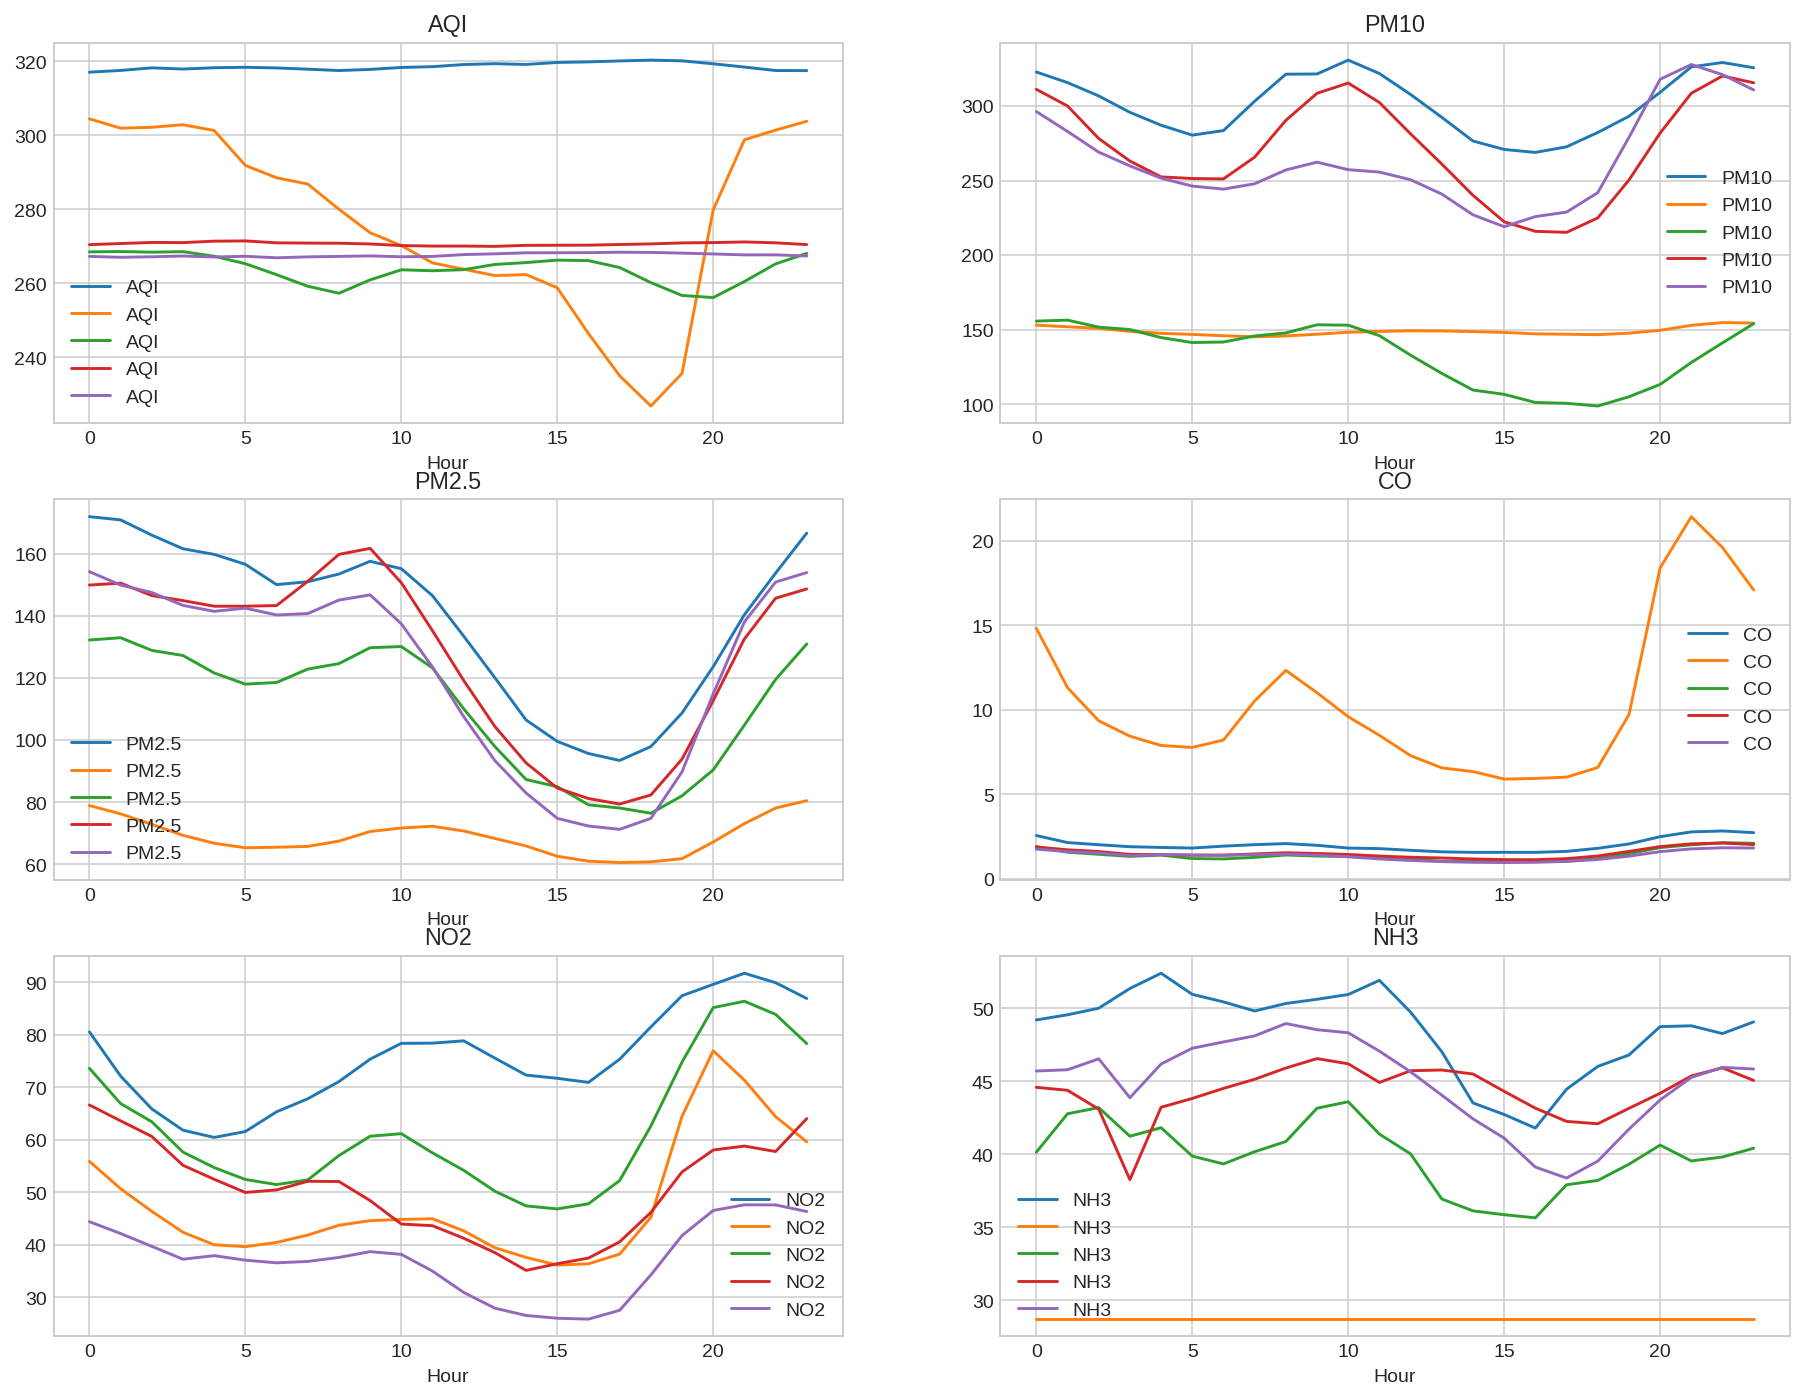

In [52]:
plot_(hour_day, pollutants, most_polluted.index)
#hour_day.plot(x="Hour", y=pollutants)

The concentration of pollutants exhibits a pattern throughout the day, with the lowest levels occurring around dawn and the highest levels around 10 o'clock. The average AQI remains constant, as expected based on its calculation method. Consequently, employing an hourly prediction window is not suitable in this scenario.

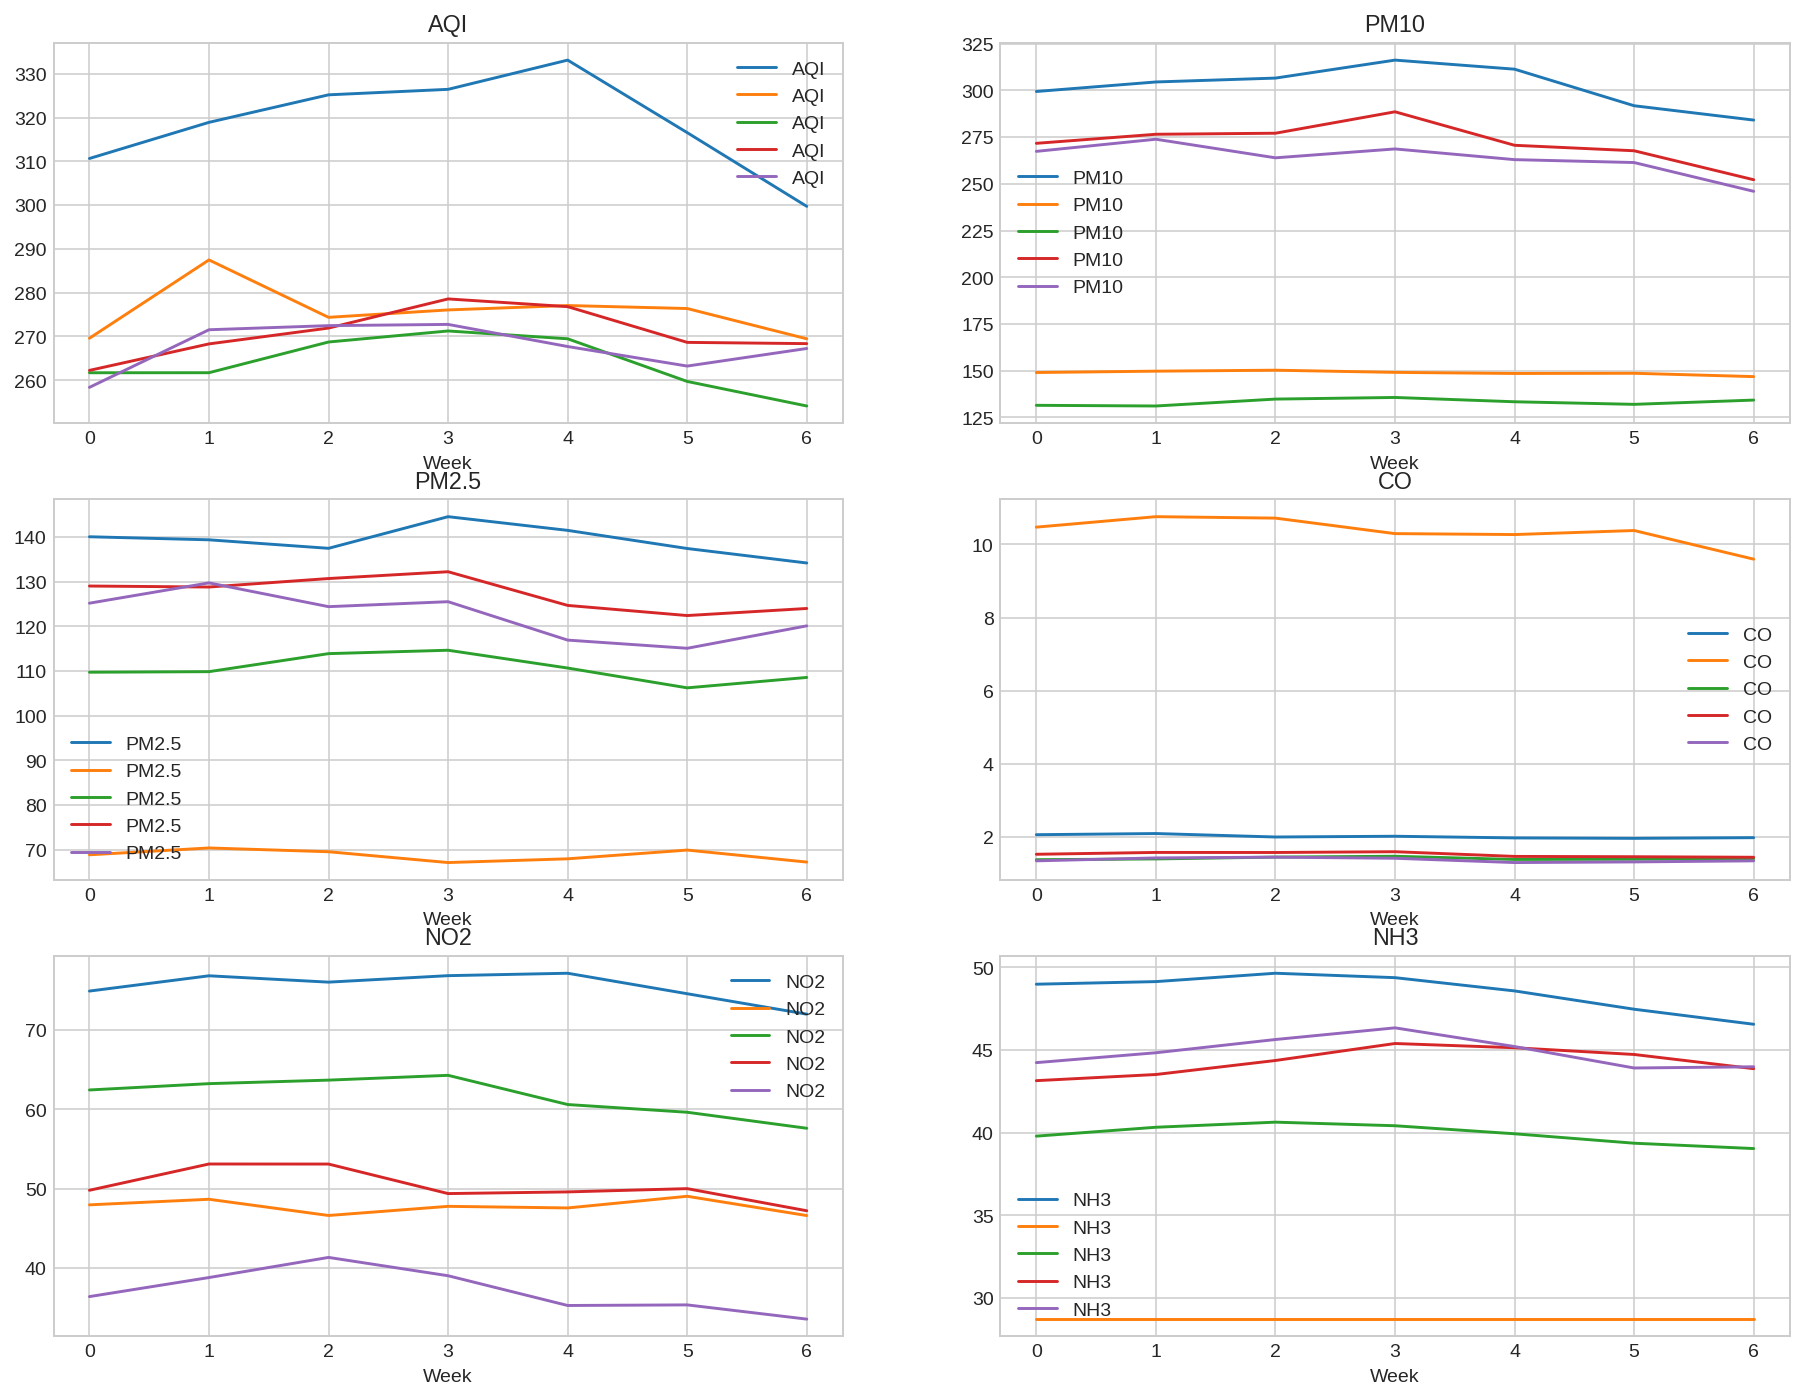

In [53]:
plot_(day_week, pollutants, most_polluted.index)

The pollution level is almost the same for each day of the week except showing a slight decrease during the weekends. This is expected because human activities are reduced during the weekends.

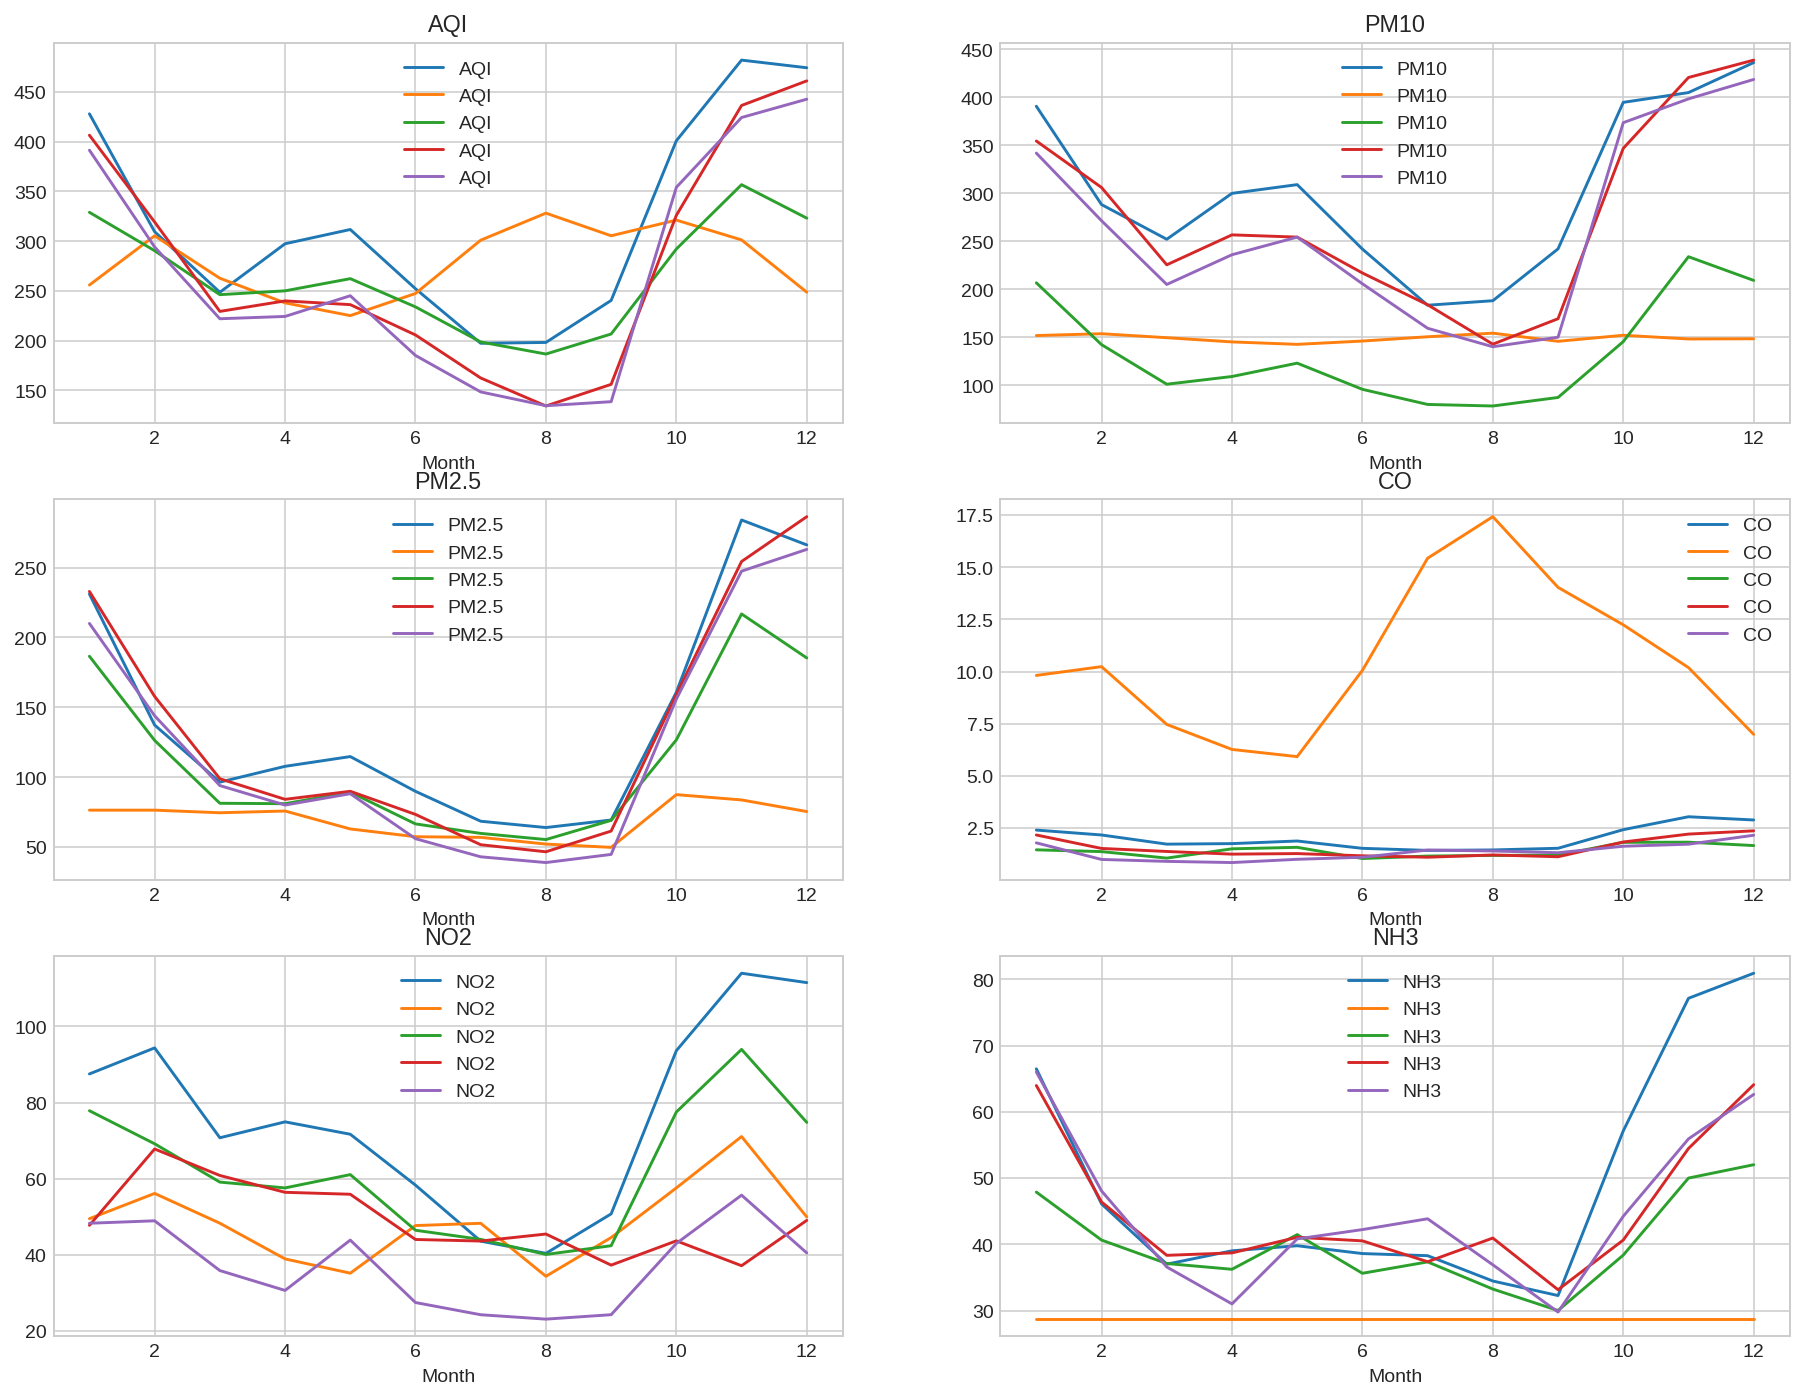

In [54]:
plot_(month_year, pollutants, most_polluted.index)

There is clearly a seasonality for most of pollutants. We can see that the level of pollutants decreases around summer and increasing in colder seasons. 

#### Trends in the data

In [55]:
daily = df1.groupby('StationId').resample('D').mean()
weekly = df1.groupby('StationId').resample('w').mean()
monthly = df1.groupby('StationId').resample('M').mean()

In [56]:
daily

PM2.5        PM10         NO        NO2        NOx   
StationId Datetime                                                             
AP001     2017-11-24  71.357143  115.750000   1.754286  20.647143  12.401429  \
          2017-11-25  81.347917  127.327500   3.208333  21.717500  14.441250   
          2017-11-26  78.322917  129.062500   1.255417  25.995833  14.848333   
          2017-11-27  86.441667  142.062917  11.292917  32.100417  27.219167   
          2017-11-28  73.183333  133.524583  13.467500  31.897500  29.704583   
...                         ...         ...        ...        ...        ...   
WB013     2020-06-27   8.651250   16.461667  22.700000  35.140000  40.450000   
          2020-06-28  14.674583   24.305833  22.700000  35.140000  40.450000   
          2020-06-29  23.779167   42.774583  21.945833  48.950833  54.929167   
          2020-06-30  16.069167   39.302917  15.128750  32.135833  38.570000   
          2020-07-01  10.500000   36.500000   7.780000  22.500000  30.250000   

                            NH3        CO        SO2          O3   Benzene   
StationId Datetime                                                           
AP001     2017-11-24  12.192857  0.100000  10.762857  109.264286  0.171429  \
          2017-11-25  12.215833  0.224167  14.836667  119.671250  0.454167   
          2017-11-26  10.279167  0.140417  26.964583  117.435833  0.223333   
          2017-11-27  17.519583  0.485417  26.402083   90.310000  1.165417   
          2017-11-28  20.786250  0.792917  15.224583   83.963750  1.859583   
...                         ...       ...        ...         ...       ...   
WB013     2020-06-27  28.710000  0.690000   4.364583   30.587917  1.322500   
          2020-06-28  28.710000  0.681250   3.490833   38.952500  1.416667   
          2020-06-29  27.267500  0.831667   5.122500   38.167917  3.520417   
          2020-06-30  28.985417  0.694167   5.877083   29.642500  1.855833   
          2020-07-01  27.230000  0.580000   2.800000   13.100000  1.310000   

                        Toluene    Xylene         AQI    Year  Month  Week   
StationId Datetime                                                           
AP001     2017-11-24   5.917143  0.101429  178.120000  2017.0   11.0   4.0  \
          2017-11-25   7.190417  0.258333  181.795000  2017.0   11.0   5.0   
          2017-11-26   7.947917  0.083750  197.250000  2017.0   11.0   6.0   
          2017-11-27   9.730000  0.784583  198.250000  2017.0   11.0   0.0   
          2017-11-28  10.331667  1.327500  178.531667  2017.0   11.0   1.0   
...                         ...       ...         ...     ...    ...   ...   
WB013     2020-06-27   7.255000  2.390000   49.833333  2020.0    6.0   5.0   
          2020-06-28   7.919583  2.390000   65.291667  2020.0    6.0   6.0   
          2020-06-29   8.636667  2.390000   63.041667  2020.0    6.0   0.0   
          2020-06-30   8.399167  2.390000   56.541667  2020.0    6.0   1.0   
          2020-07-01   7.390000  2.390000   59.000000  2020.0    7.0   2.0   

                       Day  Hour  
StationId Datetime                
AP001     2017-11-24  24.0  20.0  
          2017-11-25  25.0  11.5  
          2017-11-26  26.0  11.5  
          2017-11-27  27.0  11.5  
          2017-11-28  28.0  11.5  
...                    ...   ...  
WB013     2020-06-27  27.0  11.5  
          2020-06-28  28.0  11.5  
          2020-06-29  29.0  11.5  
          2020-06-30  30.0  11.5  
          2020-07-01   1.0   0.0  

[108035 rows x 18 columns]

Let's plot the daily, weekly and monthly AQI time series together over a single 12-month period to compare them.

Text(0.5, 0.98, 'AQI of most polluted stations')

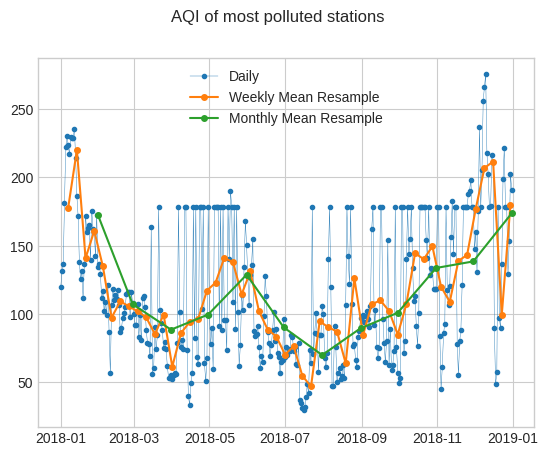

In [57]:
###### Start and end of the date range to extract
start, end = '2018-01', '2018-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(daily['AQI']['AP001'].loc[start:end], marker='.', linestyle='-', linewidth=0.3, label='Daily')
ax.plot(weekly['AQI']['AP001'].loc[start:end], marker='.', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(monthly['AQI']['AP001'].loc[start:end], marker='.', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.legend();
plt.suptitle('AQI of most polluted stations')

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.


## 3. Feature Engineering

We will create some features based on our EDA above. Our earlier analysis has shown seasonality in during the time of the day, weekday/weekend, month and year.

In [58]:
df1 = daily.copy()

In [59]:
df1 = df1.reset_index()
df1 = df1.set_index('Datetime').sort_values(by='Datetime')

Therefore, we will add new features Season, Year, Month, Part_of_Day, Is_Weekend to reflect the above.

In [60]:
df1

StationId       PM2.5    PM10         NO        NO2        NOx   
Datetime                                                                    
2015-01-01     DL013  200.961304  158.43  17.056957  12.388261  24.729130  \
2015-01-01     TN003   80.800000  158.43   6.959565  11.079130  10.552609   
2015-01-01     MH005   80.800000  158.43  22.700000  35.140000  27.375652   
2015-01-01     KA009   80.800000  158.43   2.513913  10.794348   7.141739   
2015-01-01     TN004   80.800000  158.43  33.133913  22.558261  36.864348   
...              ...         ...     ...        ...        ...        ...   
2020-07-01     DL030   18.690000  110.56   3.600000   7.340000  10.940000   
2020-07-01     DL031   38.000000  114.00   1.350000  27.120000  15.530000   
2020-07-01     DL032   80.800000  143.00   1.420000  35.140000   1.200000   
2020-07-01     UP012   20.930000  158.43  23.360000  42.930000  10.970000   
2020-07-01     WB013   10.500000   36.50   7.780000  22.500000  30.250000   

                   NH3         CO        SO2         O3   Benzene    Toluene   
Datetime                                                                       
2015-01-01   42.975652  19.159565   8.906957  38.090000  3.290000  14.830000  \
2015-01-01    4.587391   1.360000   7.621304  38.090000  3.290000  14.830000   
2015-01-01   28.710000   0.000000  12.030000  38.090000  0.000000   0.000000   
2015-01-01   20.356957   1.369130   5.078696  38.090000  3.290000  13.640435   
2015-01-01   28.710000   0.530435  12.360000  18.850435  0.173478  14.830000   
...                ...        ...        ...        ...       ...        ...   
2020-07-01   28.710000   2.080000  12.030000  29.970000  0.000000   0.250000   
2020-07-01   11.500000   0.900000   6.470000   9.930000  3.290000  14.830000   
2020-07-01  100.530000   1.390000   7.380000  12.800000  1.480000   5.850000   
2020-07-01   28.710000   0.630000  12.030000  22.530000  0.120000   0.000000   
2020-07-01   27.230000   0.580000   2.800000  13.100000  1.310000   7.390000   

            Xylene         AQI    Year  Month  Week  Day  Hour  
Datetime                                                        
2015-01-01    2.39  242.773913  2015.0    1.0   3.0  1.0  12.0  
2015-01-01    2.39  178.120000  2015.0    1.0   3.0  1.0  12.0  
2015-01-01    0.00  178.120000  2015.0    1.0   3.0  1.0  12.0  
2015-01-01    2.39  178.120000  2015.0    1.0   3.0  1.0  12.0  
2015-01-01    2.39  178.120000  2015.0    1.0   3.0  1.0  12.0  
...            ...         ...     ...    ...   ...  ...   ...  
2020-07-01    0.00  101.000000  2020.0    7.0   2.0  1.0   0.0  
2020-07-01    2.39   73.000000  2020.0    7.0   2.0  1.0   0.0  
2020-07-01    2.39  108.000000  2020.0    7.0   2.0  1.0   0.0  
2020-07-01    2.39   68.000000  2020.0    7.0   2.0  1.0   0.0  
2020-07-01    2.39   59.000000  2020.0    7.0   2.0  1.0   0.0  

[108035 rows x 19 columns]

In [61]:
#df1.drop(['AQI_Bucket'], axis=1, inplace=True)
#df1.head(2)

Since we ruled out on a window less than a day, let's resample the data into daily

In [62]:
#df1 = df1.groupby('StationId').resample('D').mean().reset_index()
df1

StationId       PM2.5    PM10         NO        NO2        NOx   
Datetime                                                                    
2015-01-01     DL013  200.961304  158.43  17.056957  12.388261  24.729130  \
2015-01-01     TN003   80.800000  158.43   6.959565  11.079130  10.552609   
2015-01-01     MH005   80.800000  158.43  22.700000  35.140000  27.375652   
2015-01-01     KA009   80.800000  158.43   2.513913  10.794348   7.141739   
2015-01-01     TN004   80.800000  158.43  33.133913  22.558261  36.864348   
...              ...         ...     ...        ...        ...        ...   
2020-07-01     DL030   18.690000  110.56   3.600000   7.340000  10.940000   
2020-07-01     DL031   38.000000  114.00   1.350000  27.120000  15.530000   
2020-07-01     DL032   80.800000  143.00   1.420000  35.140000   1.200000   
2020-07-01     UP012   20.930000  158.43  23.360000  42.930000  10.970000   
2020-07-01     WB013   10.500000   36.50   7.780000  22.500000  30.250000   

                   NH3         CO        SO2         O3   Benzene    Toluene   
Datetime                                                                       
2015-01-01   42.975652  19.159565   8.906957  38.090000  3.290000  14.830000  \
2015-01-01    4.587391   1.360000   7.621304  38.090000  3.290000  14.830000   
2015-01-01   28.710000   0.000000  12.030000  38.090000  0.000000   0.000000   
2015-01-01   20.356957   1.369130   5.078696  38.090000  3.290000  13.640435   
2015-01-01   28.710000   0.530435  12.360000  18.850435  0.173478  14.830000   
...                ...        ...        ...        ...       ...        ...   
2020-07-01   28.710000   2.080000  12.030000  29.970000  0.000000   0.250000   
2020-07-01   11.500000   0.900000   6.470000   9.930000  3.290000  14.830000   
2020-07-01  100.530000   1.390000   7.380000  12.800000  1.480000   5.850000   
2020-07-01   28.710000   0.630000  12.030000  22.530000  0.120000   0.000000   
2020-07-01   27.230000   0.580000   2.800000  13.100000  1.310000   7.390000   

            Xylene         AQI    Year  Month  Week  Day  Hour  
Datetime                                                        
2015-01-01    2.39  242.773913  2015.0    1.0   3.0  1.0  12.0  
2015-01-01    2.39  178.120000  2015.0    1.0   3.0  1.0  12.0  
2015-01-01    0.00  178.120000  2015.0    1.0   3.0  1.0  12.0  
2015-01-01    2.39  178.120000  2015.0    1.0   3.0  1.0  12.0  
2015-01-01    2.39  178.120000  2015.0    1.0   3.0  1.0  12.0  
...            ...         ...     ...    ...   ...  ...   ...  
2020-07-01    0.00  101.000000  2020.0    7.0   2.0  1.0   0.0  
2020-07-01    2.39   73.000000  2020.0    7.0   2.0  1.0   0.0  
2020-07-01    2.39  108.000000  2020.0    7.0   2.0  1.0   0.0  
2020-07-01    2.39   68.000000  2020.0    7.0   2.0  1.0   0.0  
2020-07-01    2.39   59.000000  2020.0    7.0   2.0  1.0   0.0  

[108035 rows x 19 columns]

In [63]:
df

StationId            Datetime   PM2.5    PM10      NO    NO2     NOx   
285144      DL007 2015-01-01 01:00:00  598.51  935.18   69.03  35.69  104.72  \
333336      DL008 2015-01-01 01:00:00     NaN     NaN   78.25  51.50   91.00   
485877      DL013 2015-01-01 01:00:00  310.65     NaN   30.37  17.73   35.31   
733579      DL021 2015-01-01 01:00:00     NaN     NaN     NaN  65.00  488.03   
1067398     DL033 2015-01-01 01:00:00     NaN     NaN  148.44  39.00  219.25   
...           ...                 ...     ...     ...     ...    ...     ...   
2537760     WB009 2020-07-01 00:00:00   10.52   34.55    1.75  11.02   12.78   
2547206     WB010 2020-07-01 00:00:00   14.70   29.00    3.10   6.78    9.88   
2561669     WB011 2020-07-01 00:00:00   12.57   41.40   18.00  13.70   31.70   
2569579     WB012 2020-07-01 00:00:00    8.38   36.18    4.53   6.85   11.38   
2589082     WB013 2020-07-01 00:00:00   10.50   36.50    7.78  22.50   30.25   

           NH3     CO   SO2      O3  Benzene  Toluene  Xylene   AQI   
285144     NaN   0.58   NaN  108.02    12.89    19.85   13.80   NaN  \
333336    5.75    NaN   NaN  105.25      NaN      NaN     NaN   NaN   
485877   49.32    NaN  8.23     NaN      NaN      NaN     NaN   NaN   
733579     NaN  18.00  1.50    3.50    34.65    63.44     NaN   NaN   
1067398    NaN    NaN  0.50    3.00    28.17    92.41     NaN   NaN   
...        ...    ...   ...     ...      ...      ...     ...   ...   
2537760   3.07   0.23  3.12   12.48     1.35     5.99    0.33  38.0   
2547206   6.78   0.33  3.23   10.97      NaN      NaN     NaN  35.0   
2561669  28.73   0.21  8.36   48.19     3.88    34.21     NaN  62.0   
2569579   7.95   0.16  5.50    6.13     1.60     2.69     NaN  39.0   
2589082  27.23   0.58  2.80   13.10     1.31     7.39     NaN  59.0   

           AQI_Bucket  
285144            NaN  
333336            NaN  
485877            NaN  
733579            NaN  
1067398           NaN  
...               ...  
2537760          Good  
2547206          Good  
2561669  Satisfactory  
2569579          Good  
2589082  Satisfactory  

[2586355 rows x 16 columns]

Following the [indian season names](https://en.wikipedia.org/wiki/Climate_of_India), the following code creates a column 'Season'

In [64]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'pre-monsoon', 
               4: 'pre-monsoon',
               5: 'pre-monsoon',
               6: 'Monsoon',
               7: 'Monsoon',
               8: 'Monsoon',
               9: 'Monsoon',
               10: 'Post-monsoon',
               11: 'Post-monsoon',
               12: 'Post-monsoon'}
df1['Season'] = df1['Month'].apply(lambda x: season_dict[x])

In [65]:
def part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [66]:
df1['Part_of_Day'] = df1['Hour'].apply(lambda x: part_of_day(x))


In [67]:
df1["is_weekend"] = df1.index.dayofweek > 4

### Data Preprocessing
We will use StandardScaler for numerical attributes and Onehot encoding to transform categorical attributes. We will also split the data into train and test. 

Using temporal variable is a more reliable way of splitting datasets whenever the dataset includes the date variable, and we want to predict something in the future that depends on date. 
Here we are going to split the dataframe into 85% train and 15%.

In [68]:
sp= round((df1.index[-1] - df1.index[0]).days*0.15)

We will also do the splitting before using transformations.

In [69]:
split_tp = df1.index[-1] - datetime.timedelta( days = sp)

Training dataset is:

In [70]:
X_train = df1[df1.index < split_tp]
y_train = X_train['AQI']

Validation datset is:

In [71]:

X_validation = df1[df1.index >= split_tp]
y_validation = X_validation['AQI']

print( 'Training Min Date: {}'.format( X_train.index.min() ) )
print( 'Training Max Date: {}'.format( X_train.index.max() ) )

print( '\nValidation Min Date: {}'.format( X_validation.index.min() ) )
print( 'Validation Max Date: {}'.format( X_validation.index.max() ) )
X_train.head(2)

Training Min Date: 2015-01-01 00:00:00
Training Max Date: 2019-09-03 00:00:00

Validation Min Date: 2019-09-04 00:00:00
Validation Max Date: 2020-07-01 00:00:00


StationId       PM2.5    PM10         NO        NO2        NOx   
Datetime                                                                    
2015-01-01     DL013  200.961304  158.43  17.056957  12.388261  24.729130  \
2015-01-01     TN003   80.800000  158.43   6.959565  11.079130  10.552609   

                  NH3         CO       SO2     O3  ...  Xylene         AQI   
Datetime                                           ...                       
2015-01-01  42.975652  19.159565  8.906957  38.09  ...    2.39  242.773913  \
2015-01-01   4.587391   1.360000  7.621304  38.09  ...    2.39  178.120000   

              Year  Month  Week  Day  Hour  Season  Part_of_Day is_weekend  
Datetime                                                                    
2015-01-01  2015.0    1.0   3.0  1.0  12.0  Winter    afternoon      False  
2015-01-01  2015.0    1.0   3.0  1.0  12.0  Winter    afternoon      False  

[2 rows x 22 columns]

In [72]:
# check the proportion of validation data datapoints
X_validation.shape[0]/df1.shape[0] * 100

28.83880224001481

Now let's normalize the features

In [73]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#X= df1.drop(['AQI', 'AQI_Bucket'], axis= 1)
#y= df1['AQI']

num_attributes = df1.select_dtypes( include = 'number')
cat_attributes = df1.select_dtypes( include = ['object'])

print(num_attributes.columns)
print(cat_attributes.columns)


Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'Year', 'Month', 'Week', 'Day',
       'Hour'],
      dtype='object')
Index(['StationId', 'Season', 'Part_of_Day'], dtype='object')


In [74]:
years = df1['Year'].unique()

In [75]:
Scaler = StandardScaler()
for att in num_attributes:
    if att != 'Year':
        X_train[att] = Scaler.fit_transform( X_train[[att]].values )


For categorical attributes:

In [76]:
label_encoder = LabelEncoder()

# Iterate over each categorical attribute
for att in cat_attributes:
    X_train[att] = label_encoder.fit_transform( X_train[[att]].values)         

# is_holiday
X_train['is_weekend'] = X_train['is_weekend'].apply(lambda x: 1 if x == True else 0)

In [77]:
X_train.head(2)

StationId     PM2.5      PM10        NO       NO2       NOx   
Datetime                                                                  
2015-01-01         17  1.842517 -0.081456 -0.217707 -0.974564 -0.432249  \
2015-01-01         83 -0.048589 -0.081456 -0.575347 -1.026950 -0.810472   

                 NH3        CO       SO2        O3  ...    Xylene       AQI   
Datetime                                            ...                       
2015-01-01  0.758986  6.261406 -0.354274 -0.032666  ... -0.013059  0.521099  \
2015-01-01 -1.449871 -0.056175 -0.485688 -0.032666  ... -0.013059 -0.077760   

              Year     Month      Week       Day      Hour  Season   
Datetime                                                             
2015-01-01  2015.0 -1.608431  0.000254 -1.670194  1.657562       2  \
2015-01-01  2015.0 -1.608431  0.000254 -1.670194  1.657562       2   

            Part_of_Day  is_weekend  
Datetime                             
2015-01-01            0           0  
2015-01-01            0           0  

[2 rows x 22 columns]

In [78]:
X_validation.head(2)

StationId      PM2.5        PM10         NO        NO2        NOx   
Datetime                                                                       
2019-09-04     PB001  43.397917  142.911250  13.252083   8.810417  22.061250  \
2019-09-04     DL003  73.104167  155.083333   3.247917  32.880417  20.137917   

                  NH3        CO    SO2         O3  ...  Xylene         AQI   
Datetime                                           ...                       
2019-09-04  11.070833  0.820833   6.23  35.379167  ...    2.00  143.583333  \
2019-09-04  21.158333  1.011250  16.07  57.651250  ...    2.39  154.000000   

              Year  Month  Week  Day  Hour   Season  Part_of_Day is_weekend  
Datetime                                                                     
2019-09-04  2019.0    9.0   2.0  4.0  11.5  Monsoon        night      False  
2019-09-04  2019.0    9.0   2.0  4.0  11.5  Monsoon        night      False  

[2 rows x 22 columns]

Apply transformation for validation dataset

In [79]:
for att in num_attributes:
    X_validation[att] = Scaler.transform(X_validation[[att]].values)
    
for att in ['Season', 'Part_of_Day']:
     X_validation[att] = label_encoder.transform( X_train[[att]].values ) 

X_validation['is_weekend'] = X_validation['is_weekend'].apply(lambda x: 1 if x == True else 0)

ValueError: y contains previously unseen labels: 2

The target variable after transformation

In [ ]:
y_validation = X_validation['AQI']

y_train = X_train['AQI'] 

### Feature selection

Selecting the most relevant features that describes our dataset removing collinear features, its explain the same part of the phenomenon. We will use the simplest model for now.

In [ ]:
df3 = X_train.copy()

#### Best Features from Boruta

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
# creating training and test dataset for Boruta, because it can't be a dataframe type
X_train_n = df3.drop( ['AQI'], axis=1 ).values
y_train_n = y_train.values.ravel()

# Define RandomForestRegressor
rf = RandomForestRegressor( n_jobs=-1 )

# Define Boruta
boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 ).fit( X_train_n, y_train_n )

In [ ]:
cols_selected = boruta.support_.tolist()

X_train_fs = df3.drop(['Datetime', 'AQI'], axis = 1)
cols_selected_boruta = X_train_fs.iloc[ :, cols_selected].columns.tolist()

# Not selected boruta features
cols_not_selected_boruta = np.setdiff1d(X_train_fs.columns, cols_selected_boruta)
pd.DataFrame(data = cols_selected_boruta, columns = ['feature_selected'])

#### Best Features from Random Forest

In [ ]:
X_train = df3.drop( ['Datetime', 'AQI'], axis=1 ).copy()
y_train = df3['AQI'].copy()

In [ ]:
# train random forest classifier
rf = RandomForestRegressor(n_estimators = 200, n_jobs =-1, random_state = 42)
rf.fit(X_train_n, y_train_n)

# feature importance data frame
feat_imp = pd.DataFrame({'feature': X_train.columns,
                        'feature_importance': rf.feature_importances_})\
                        .sort_values('feature_importance', ascending=False)\
                        .reset_index(drop=True)


# plot feature importance
plt.subplots(figsize=(12,6))
sns.barplot(x='feature_importance', y='feature', data=feat_imp, orient='h', color='royalblue')\
    .set_title('Feature Importance');

Both returned similar results. However we can see that PM2.5 has high importance than the remaining features. It is a good idea to do the only based on one feature and compare the results. For now we will take the features selected based on boruta.

In [ ]:
# columns to add
feat_to_add = ['Datetime', 'AQI']

# final features

final_features = cols_selected_boruta.copy()
final_features.extend( feat_to_add )
print(final_features)

In [ ]:
# Applying selected features by boruta on train and validation datasets
x_train = X_train[ cols_selected_boruta ].copy()
x_validation = X_validation[ cols_selected_boruta ].copy()

# Time Series Data Preparation for cross-validation
x_training = df3[ final_features ].copy()

### Using machine learning algorithms

Machine learning algorithms predict a single value and cannot be used directly for multi-step forecasting. We can use recursive method to predict multiple point at a time.

We will train several models and select the best performing one for deployment.

##### Five different algorithms are going to be used to predict the target variable:

-  **Average:** averaging model is the model we use most in everyday life, it will always predict the average. It is useful as it is a comparative basis for implementing other models

 - **Logistic Regression:** uses a complex cost function, which can be defined as the Sigmoid function. The output of the classification is based on the probability score between 0 and 1 of the input being in one class or another according to a threshold

 - **Random Forest:** it is a tree based model build with multiple ensamble decision trees created with the bagging method. Then, all the classifiers take a weighted vote on their predictions. Since the algorithm goal is not trying to find a linear function to describe the event, it works for problems with more complex behaviour

 - **XGBoost:** it is also a tree based model but they are built in a different way. While Random Forests builds each tree independently, XGBoost builds one tree at the time learning with its predecessor.
 - LightGBM: is a gradient boosting framework that uses tree based learning algorithms.

Let's define some helper functions and pipeline the training and evaluation.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import RandomizedSearchCV

def mean_absolute_percentage_error( y, yhat ):
    y, yhat = np.array(y), np.array(yhat)
    return np.mean( np.abs( ( y-yhat ) / y ))

def mean_percentage_error( y, yhat ):
    return np.mean( ( y - yhat ) / y )

# Define the function to evaluate the models
def weighted_mean_absolute_error(df, y, yhat):
    weights = 1
    return np.round(np.sum(weights*abs(y-yhat))/(np.sum(weights)), 2)

def ml_error( df, model_name, y, yhat):
    mae = mean_absolute_error( y,yhat )
    mape = mean_absolute_percentage_error( y,yhat )
    rmse = np.sqrt(mean_squared_error( y,yhat ))
    WMAE = weighted_mean_absolute_error(df, y, yhat)
    
    return pd.DataFrame( {'Model Name': model_name,
                          'MAE': mae,
                          'RMSE': rmse,
                          'WMAE': WMAE}, index=[0])

# time-series cross validation implementation
def cross_validation( x_training, kfold, model_name, model, sp, verbose=False ):
    mae_list = []
    mape_list = []
    rmse_list = []
    WMAE_list = []
     
    for k in reversed( range( 1, kfold+1 ) ): #k-fold implementation
        if verbose:
            print( '\nKFold Number: {}'.format( k ) )
        # start and end date for validation 
        start_date_validation = x_training['date'].max() - datetime.timedelta( days=k*sp) 
        end_date_validation = x_training['date'].max() - datetime.timedelta( days=(k-1)*sp)

        # filtering dataset
        training = x_training[x_training['date'] < start_date_validation]
        validation = x_training[(x_training['date'] >= start_date_validation) 
                                & (x_training['date'] <= end_date_validation)]

        # training and validation dataset
        # training
        xtraining = training.drop( ['Datetime', 'AQI'], axis=1 ) 
        ytraining = training['AQI']

        # validation
        xvalidation = validation.drop( ['Datetime', 'AQI'], axis=1 )
        yvalidation = validation['AQI']

        # model
        m = model.fit( xtraining, ytraining )

        # prediction
        yhat = m.predict(xvalidation)

        # performance
        m_result = ml_error( xvalidation, model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

        # store performance of each kfold iteration
        mae_list.append(  m_result['MAE'] )
        rmse_list.append( m_result['RMSE'] )
        WMAE_list.append( m_result['WMAE'])

    return pd.DataFrame( {'Model Name': model_name,
                          'MAE CV':  np.round( np.mean( mae_list ), 2 ).astype( str )  
                          + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
                          'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) 
                          + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ),
                          'WMAE CV': np.round( np.mean( WMAE_list ), 2 ).astype( str ) 
                          + ' +/- ' + np.round( np.std( WMAE_list ), 2 ).astype( str )}, index=[0] )




# prepare a list of ml models
def get_models(models=dict()):
    # linear models
    models['lr'] = LinearRegression()
    models['lasso'] = Lasso()
    models['rf'] = RandomForestRegressor( n_estimators = 100, n_jobs =-1, random_state=7 )
    models['xgb'] = xgb.XGBRegressor( objective='reg:squarederror', n_estimators = 100, random_state=7)
    models['lgbm'] = lgbm.LGBMRegressor(n_estimators = 100, n_jobs =-1, random_state=7)
    models['ridge'] = Ridge()
    models['en'] = ElasticNet()
    models['huber'] = HuberRegressor()
    models['lars'] = Lars()
    models['llars'] = LassoLars()
    models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
    models['ranscac'] = RANSACRegressor()
    models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
    print('Defined %d models' % len(models))
    return models

#### Average model

In [ ]:
aux1 = x_validation.copy()
aux1['AQI'] = y_validation.copy()

In [ ]:
# Predictions
aux2 = aux1[['StationId', 'AQI']].groupby('StationId').mean().reset_index().rename(columns = {'AQI': 'predictions'})
aux1 = pd.merge( aux1, aux2, how= 'left', on='StationId')
yhat_baseline = aux1['predictions']

In [ ]:
# Performance
baseline_result = ml_error( aux1 ,'Average Model', np.expm1( y_validation ), np.expm1( yhat_baseline ))
baseline_result

## 4. Forcasting

We want to predict the AQI index then infer AQI_Bucket based on AQI as we did above.

In [ ]:
import joblib
joblib.dump(model, "model/best_model.pkl")

# Things To-Do
- **Fix the error**: The error is because the data split is based on time and year in the training dataset may not appear in the validation dataset. Fit Year on the all values of year and transform for both train and validation dataset.
- **Create a training and validation pipeline**
- **Tune best model**
- **Test deployed model**
- **Write documentation**
